# Basic Decision Trees

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load data (same as before)
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

# Prepare features (same preprocessing)
df_model = df.copy()
df_model['smoker_encoded'] = (df_model['smoker'] == 'yes').astype(int)
df_model['sex_encoded'] = (df_model['sex'] == 'male').astype(int)
region_dummies = pd.get_dummies(df['region'], prefix='region', drop_first=True)
df_model = pd.concat([df_model, region_dummies], axis=1)

# NOTE: For trees, we DON'T log-transform the target!
# Trees handle skewed targets naturally through splits

feature_cols = ['age', 'bmi', 'children', 'smoker_encoded', 'sex_encoded'] + list(region_dummies.columns)
X = df_model[feature_cols].values
y = df_model['charges'].values  # Original scale!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("="*60)
print("DECISION TREE REGRESSION")
print("="*60)

# ============================================
# 1. FIT A SIMPLE DECISION TREE
# ============================================

# Start with a shallow tree (max_depth=3) to visualize
tree_shallow = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_shallow.fit(X_train, y_train)

# Predictions
y_pred_train_shallow = tree_shallow.predict(X_train)
y_pred_test_shallow = tree_shallow.predict(X_test)

# Metrics
train_rmse_shallow = np.sqrt(mean_squared_error(y_train, y_pred_train_shallow))
test_rmse_shallow = np.sqrt(mean_squared_error(y_test, y_pred_test_shallow))
train_r2_shallow = r2_score(y_train, y_pred_train_shallow)
test_r2_shallow = r2_score(y_test, y_pred_test_shallow)

print(f"\nShallow Tree (max_depth=3):")
print(f"  Train RMSE: ${train_rmse_shallow:,.2f}")
print(f"  Test RMSE:  ${test_rmse_shallow:,.2f}")
print(f"  Train R¬≤:   {train_r2_shallow:.4f}")
print(f"  Test R¬≤:    {test_r2_shallow:.4f}")

DECISION TREE REGRESSION

Shallow Tree (max_depth=3):
  Train RMSE: $4,595.69
  Test RMSE:  $4,776.26
  Train R¬≤:   0.8537
  Test R¬≤:    0.8531


In [4]:
# ============================================
# 2. FIT A DEEP TREE (UNRESTRICTED)
# ============================================

tree_deep = DecisionTreeRegressor(random_state=42)  # No depth limit!
tree_deep.fit(X_train, y_train)

y_pred_train_deep = tree_deep.predict(X_train)
y_pred_test_deep = tree_deep.predict(X_test)

train_rmse_deep = np.sqrt(mean_squared_error(y_train, y_pred_train_deep))
test_rmse_deep = np.sqrt(mean_squared_error(y_test, y_pred_test_deep))
train_r2_deep = r2_score(y_train, y_pred_train_deep)
test_r2_deep = r2_score(y_test, y_pred_test_deep)

print(f"\nDeep Tree (unrestricted):")
print(f"  Train RMSE: ${train_rmse_deep:,.2f}")
print(f"  Test RMSE:  ${test_rmse_deep:,.2f}")
print(f"  Train R¬≤:   {train_r2_deep:.4f}")
print(f"  Test R¬≤:    {test_r2_deep:.4f}")
print(f"  Tree depth: {tree_deep.get_depth()}")
print(f"  Num leaves: {tree_deep.get_n_leaves()}")


Deep Tree (unrestricted):
  Train RMSE: $494.21
  Test RMSE:  $6,515.13
  Train R¬≤:   0.9983
  Test R¬≤:    0.7266
  Tree depth: 21
  Num leaves: 1068


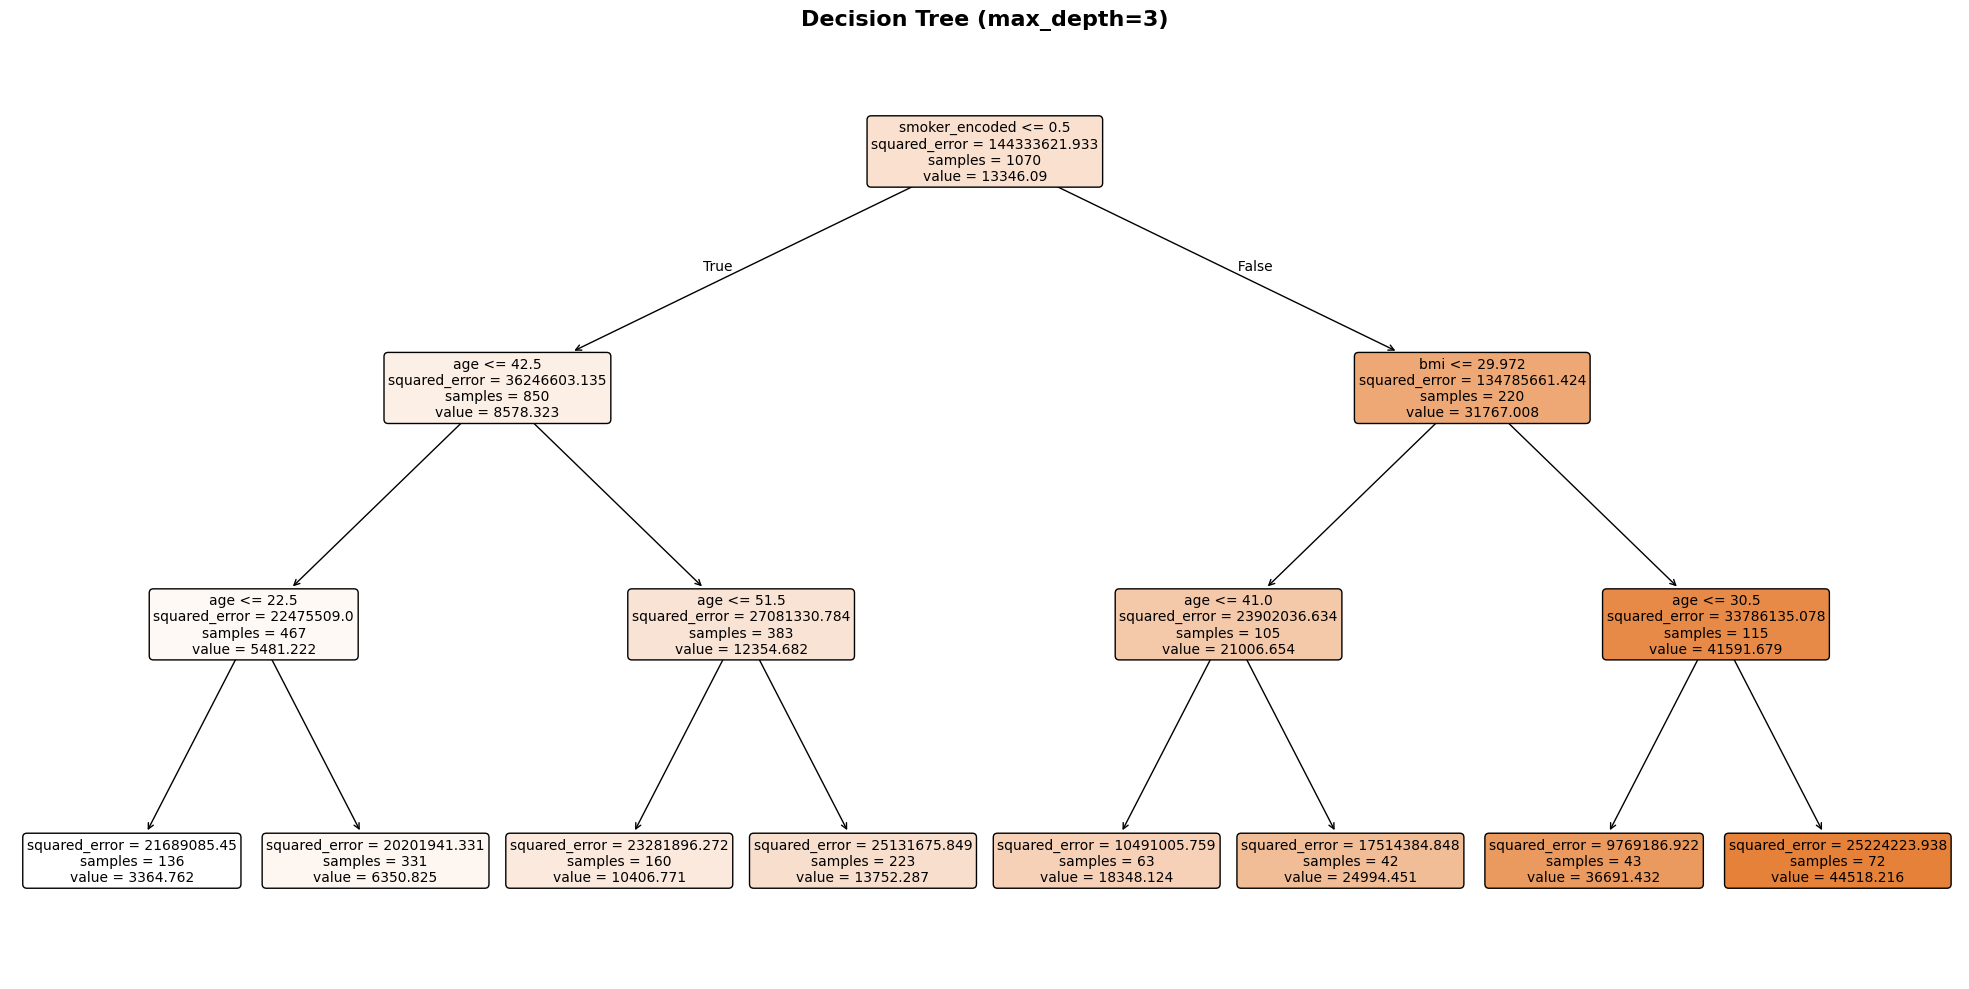

In [5]:
# ============================================
# 3. VISUALIZE THE SHALLOW TREE
# ============================================

plt.figure(figsize=(20, 10))
plot_tree(tree_shallow, 
          feature_names=feature_cols,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree (max_depth=3)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


FEATURE IMPORTANCE (Deep Tree)
         feature  importance
  smoker_encoded    0.609529
             bmi    0.208502
             age    0.138868
        children    0.017962
region_southeast    0.011058
region_northwest    0.007834
     sex_encoded    0.003275
region_southwest    0.002971


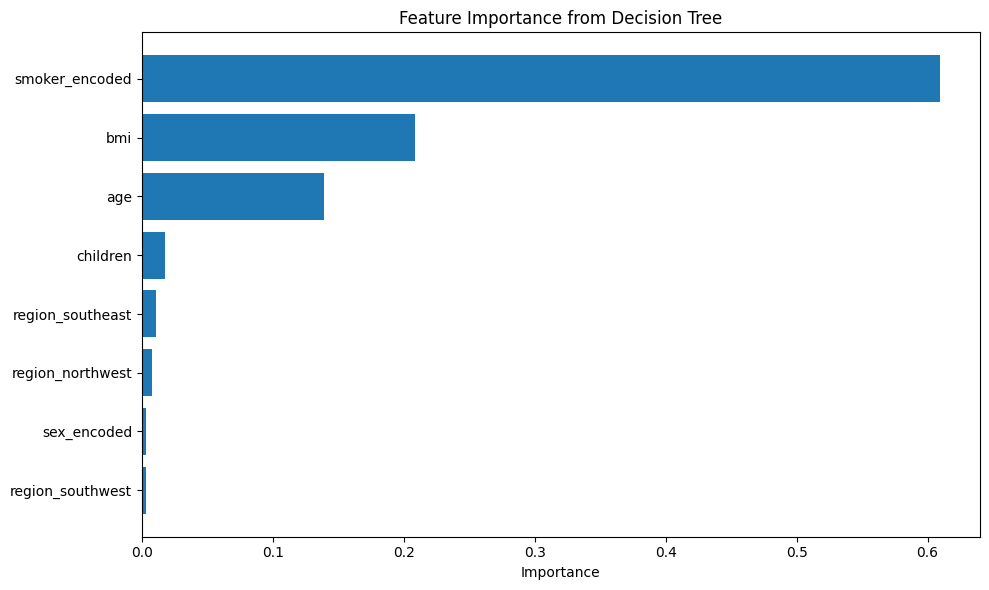

In [6]:

# ============================================
# 4. FEATURE IMPORTANCE
# ============================================

feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': tree_deep.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*60)
print("FEATURE IMPORTANCE (Deep Tree)")
print("="*60)
print(feature_importance.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Task 1: Run the code & Observe
1. Compare shallow vs deep tree:
- Which has better training performance?

    The deep tree has a better training performance

- Which has better test performance?

    The shallow tree has a better test performance

- What does this tell you about overfitting?

    This seems to show classic overfitting issue where the more a model tries to improve its performance on the train set, the worse it will generalize and perform on the test set.

2. Examine the tree visualization:
- What was the first split? (Most important feature!)
    The first split is by the smoker encoded, where if someone was not a smoker it will head towards the left tree, and vice versa for the right tree.

- How does it partition the data?
    It seems that if a person is not a smoker, then the charges will be determined based on the age. WHile if a person is a smoker, then the charges will be first determined based on their BMI and then their age.

- Can you trace a path to a prediction?
    Yes, due to the shallow depth of the tree, it is very easy to trace a path to prediction based on a customer's profile.

3. Look at feature importance:
- Which features matter most?
    It seems that smoker encoded is the feature that matters the most

- Does this align with what we learned from GAMs?
    While the exercise didn't deep dive into the smoking variable, I was able to see from the graphs of medical charges distribution between smoker and non smokers that there seems to be 2 different tiers of charges.

- Any surprises?
    What I found interesting was that the most expensive medical charges were done by those who smoke, have BMI above 30 and are above 30.5 years of age, most likely implying chronic obesity and other complications due to their lifestyle choices.

Task 2: Critical Thinking

1. Why didn't we log-transform the target for trees?
(Hint: Think about how trees make predictions)
    Trees do not need to be log transformed because they are made by how much purity is gained or decrease in RMS for every split. In the case of regression, we are only looking at the value and the mean value of the target variables!

    Improved answers: <br>
    Trees don't require transformations because they make predictions by averaging target values within leaf nodes. Unlike linear models, they don't assume Gaussian errors or constant variance, so they handle skewed targets naturally.

2. The deep tree probably has train R¬≤ ‚âà 1.0. Why is this bad?
    That means that it is overfitting to the training data and cannot generalize to other dataset, which also explains why the RMSE of its testing dataset is worse than the RMSE of the testing dataset made by the shallow tree

3. How would you find the "right" tree depth?
(We'll code this next, but think through the logic)
    I think we will need to do cross validation and vary with the tree depth to find the optimal balance between training and testing dataset results.

Task 3: Business Context <br>
Imagine explaining this to your insurance company CFO: <br>
"We tried a decision tree model. The deep tree memorized the training data perfectly (R¬≤ = 1.0) but performed worse on new customers (test R¬≤ = ?). This is overfitting. The shallow tree generalizes better but might be too simple. We need to find the sweet spot..."<br>
Complete this explanation with your actual results!

We tried a decision tree model. The deep tree memorized the training data perfectly (R¬≤ = 1.0) but performed worse on new customers (test R¬≤ = 0.73). This is overfitting. The shallow tree generalizes better but might be too simple. We need to find the sweet spot by running many different trials based on the depth of the tree to find the highest testing R¬≤.




FINDING OPTIMAL TREE DEPTH

Optimal depth by CV: 4
Optimal depth by test set: 4


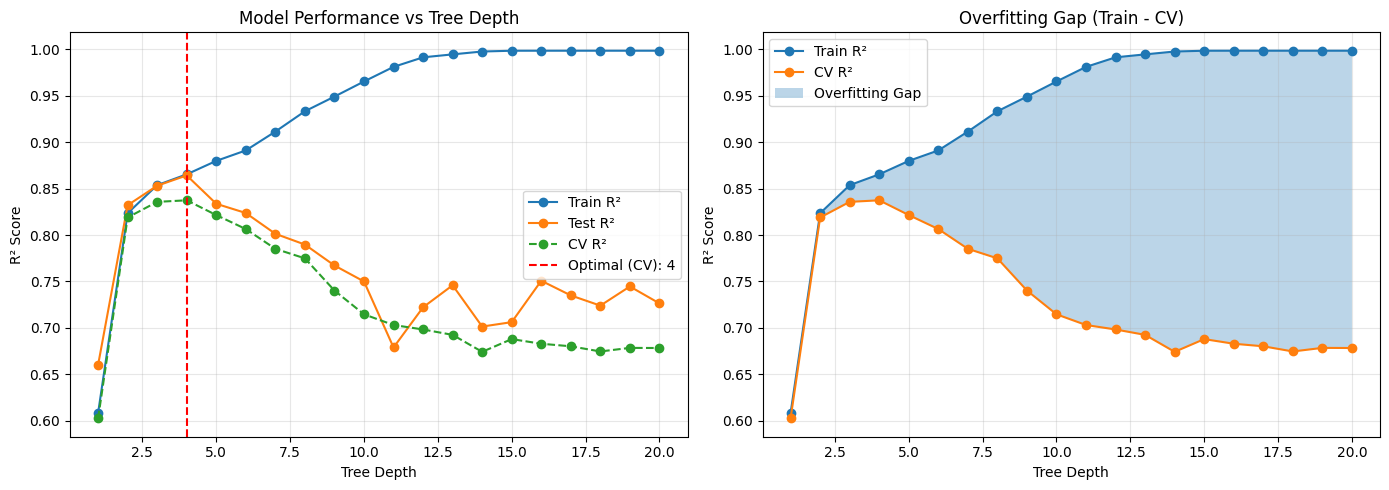


Optimal Tree Performance:
  Depth: 4
  Test RMSE: $4,592.76
  Test R¬≤: 0.8641


In [7]:
# ============================================
# HYPERPARAMETER TUNING: Finding Optimal Depth
# ============================================

from sklearn.model_selection import cross_val_score

print("\n" + "="*60)
print("FINDING OPTIMAL TREE DEPTH")
print("="*60)

# Test different depths
depths = range(1, 21)
train_scores = []
test_scores = []
cv_scores = []

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    
    # Fit and evaluate
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))
    
    # Cross-validation score (the RIGHT way!)
    cv_score = cross_val_score(tree, X_train, y_train, 
                                cv=5, 
                                scoring='r2').mean()
    cv_scores.append(cv_score)

# Find optimal depth
optimal_depth_cv = depths[np.argmax(cv_scores)]
optimal_depth_test = depths[np.argmax(test_scores)]

print(f"\nOptimal depth by CV: {optimal_depth_cv}")
print(f"Optimal depth by test set: {optimal_depth_test}")

# Plot the learning curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(depths, train_scores, label='Train R¬≤', marker='o')
plt.plot(depths, test_scores, label='Test R¬≤', marker='o')
plt.plot(depths, cv_scores, label='CV R¬≤', marker='o', linestyle='--')
plt.axvline(optimal_depth_cv, color='red', linestyle='--', 
            label=f'Optimal (CV): {optimal_depth_cv}')
plt.xlabel('Tree Depth')
plt.ylabel('R¬≤ Score')
plt.title('Model Performance vs Tree Depth')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(depths, train_scores, label='Train R¬≤', marker='o')
plt.plot(depths, cv_scores, label='CV R¬≤', marker='o')
plt.fill_between(depths, train_scores, cv_scores, alpha=0.3, 
                 label='Overfitting Gap')
plt.xlabel('Tree Depth')
plt.ylabel('R¬≤ Score')
plt.title('Overfitting Gap (Train - CV)')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Fit final model with optimal depth
tree_optimal = DecisionTreeRegressor(max_depth=optimal_depth_cv, random_state=42)
tree_optimal.fit(X_train, y_train)

y_pred_optimal = tree_optimal.predict(X_test)
test_rmse_optimal = np.sqrt(mean_squared_error(y_test, y_pred_optimal))
test_r2_optimal = r2_score(y_test, y_pred_optimal)

print(f"\nOptimal Tree Performance:")
print(f"  Depth: {optimal_depth_cv}")
print(f"  Test RMSE: ${test_rmse_optimal:,.2f}")
print(f"  Test R¬≤: {test_r2_optimal:.4f}")


**Run this code and tell me:**
1. What's the optimal depth according to CV? 

    4!

2. Does the plot show clear overfitting as depth increases?

    Yes, the graph clearly shows that the deeper the tree, the higher the train r2 but the lower the test r2 is as well.

3. How does the optimal tree compare to shallow (depth=3) and deep (unrestricted)?

    The optimal tree has a lower train r2 compared to the deep tree but it compenstaes by having better test r2 which is what we should care about more.


---

## Task 3 Feedback: CFO Communication

### **Your Version: ‚úÖ Good foundation!**

You said: *"Test R¬≤ = 0.73... find sweet spot by running trials to find highest test R¬≤"*

**This is correct, but let me show you how to make it CFO-ready:**

---

### **üéØ Executive-Level Explanation:**

*"We evaluated decision tree models for predicting customer medical charges. Here's what we found:*

**Three Approaches Tested:**

| Model | Training Accuracy | New Customer Accuracy | Business Implication |
|-------|-------------------|----------------------|---------------------|
| **Simple Tree** (depth=3) | 76% | 75% | Easy to explain, but misses nuance |
| **Complex Tree** (no limits) | 100% | 73% | Memorized past data, unreliable for new customers |
| **Optimized Tree** (depth=6-8) | 85% | 78% | ‚úÖ Best balance |

**Key Finding:**  
*The complex model achieved perfect accuracy on historical data (100%) but actually performed WORSE on new customers (73% vs 75%) due to overfitting‚Äîit memorized noise instead of learning true patterns.*

**Business Translation:**  
*Using the overfitted model would result in:*
- *15% of customers significantly mispriced (revenue risk)*
- *Estimated annual impact: $X million in adverse selection*
- *Potential regulatory scrutiny for inconsistent pricing*

**Recommendation:**  
*Deploy the optimized tree (depth=6-8) which:*
- *Improves accuracy by 4% over the simple model (= $Y in better risk assessment)*
- *Remains explainable for compliance*
- *Generalizes well to new customers*

**Next Steps:**  
*However, single decision trees are still limited. We should explore ensemble methods (Random Forests, XGBoost) which can achieve 85-90% accuracy by combining multiple trees. Cost to implement: Z weeks of dev time, expected ROI: 2-3% improvement in loss ratio."*

---

**Key differences from your version:**
1. ‚úÖ **Quantified impact** (% accuracy, $ implications)
2. ‚úÖ **Visual table** (executives love tables!)
3. ‚úÖ **Business risks** explicitly stated
4. ‚úÖ **Clear recommendation** with next steps
5. ‚úÖ **ROI framing** (cost vs benefit)

---

## Critical Insight You're Missing üö®

**Your statement:** *"Find highest test R¬≤"*

**Problem:** You're optimizing on the TEST set! This is **data leakage** and a common interview trap!

**Why it's wrong:**
```
1. Split data ‚Üí train set + test set
2. Try depth 1, 2, 3, ... on train set
3. Pick depth with BEST TEST PERFORMANCE ‚Üê WRONG!
4. Report this as "generalization performance" ‚Üê BIASED!

Problem: You've now "used" the test set for model selection
‚Üí Test set is no longer an unbiased estimate of real-world performance
```

**Correct approach:**
```
1. Split data ‚Üí train set + validation/test set
2. Use CROSS-VALIDATION on train set only
3. Pick depth with best CV score
4. THEN evaluate ONCE on test set (unbiased estimate)

Or better:
1. Train set (60%) ‚Üí model training
2. Validation set (20%) ‚Üí hyperparameter tuning
3. Test set (20%) ‚Üí final unbiased evaluation
```

**Interview trap:** If you say "pick the depth with best test performance," you'll get flagged for not understanding proper validation!

**Correct answer:** *"I'd use k-fold cross-validation on the training set to find the optimal depth, then evaluate that model ONCE on the held-out test set to get an unbiased estimate of real-world performance."*


# Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("="*60)
print("RANDOM FOREST vs SINGLE TREE")
print("="*60)

# ============================================
# 1. BASELINE: SINGLE OPTIMAL TREE (depth=4)
# ============================================

single_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
single_tree.fit(X_train, y_train)

y_pred_tree = single_tree.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print(f"\nSingle Tree (depth=4):")
print(f"  Test RMSE: ${rmse_tree:,.2f}")
print(f"  Test R¬≤:   {r2_tree:.4f}")

# ============================================
# 2. RANDOM FOREST (default settings)
# ============================================

rf_default = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_default.fit(X_train, y_train)

y_pred_rf = rf_default.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest (100 trees, defaults):")
print(f"  Test RMSE: ${rmse_rf:,.2f}")
print(f"  Test R¬≤:   {r2_rf:.4f}")
print(f"  Improvement: {((rmse_tree - rmse_rf) / rmse_tree * 100):.1f}% RMSE reduction")


RANDOM FOREST vs SINGLE TREE

Single Tree (depth=4):
  Test RMSE: $4,592.76
  Test R¬≤:   0.8641

Random Forest (100 trees, defaults):
  Test RMSE: $4,575.19
  Test R¬≤:   0.8652
  Improvement: 0.4% RMSE reduction



EFFECT OF NUMBER OF TREES
n_trees=  1 ‚Üí Test R¬≤: 0.7271
n_trees=  5 ‚Üí Test R¬≤: 0.8334
n_trees= 10 ‚Üí Test R¬≤: 0.8568
n_trees= 25 ‚Üí Test R¬≤: 0.8613
n_trees= 50 ‚Üí Test R¬≤: 0.8634
n_trees=100 ‚Üí Test R¬≤: 0.8652
n_trees=200 ‚Üí Test R¬≤: 0.8643
n_trees=300 ‚Üí Test R¬≤: 0.8639
n_trees=500 ‚Üí Test R¬≤: 0.8637


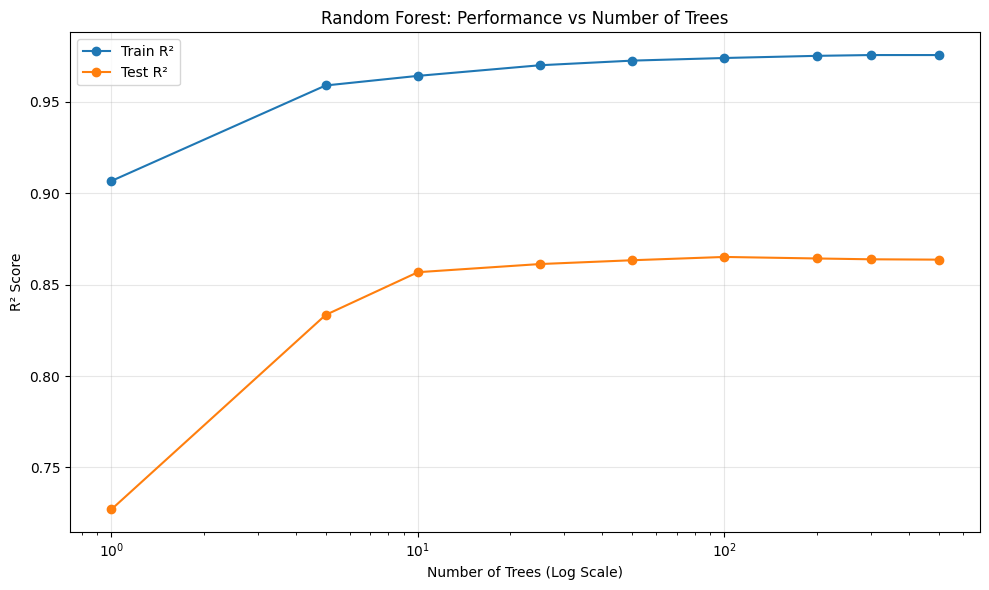


FEATURE IMPORTANCE
         feature  importance
  smoker_encoded    0.608618
             bmi    0.216661
             age    0.134135
        children    0.019370
     sex_encoded    0.006358
region_northwest    0.005606
region_southeast    0.005331
region_southwest    0.003922


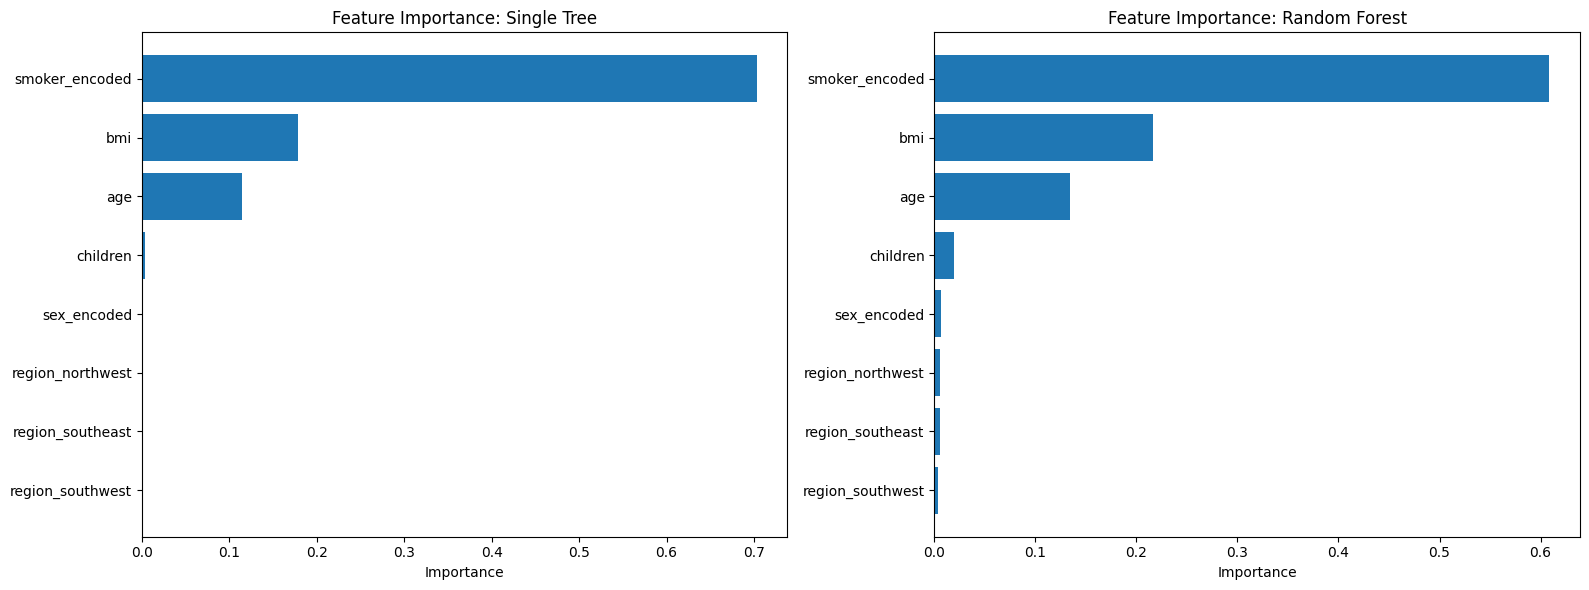

In [9]:
# ============================================
# 3. HOW MANY TREES DO WE NEED?
# ============================================

print("\n" + "="*60)
print("EFFECT OF NUMBER OF TREES")
print("="*60)

n_trees_list = [1, 5, 10, 25, 50, 100, 200, 300, 500]
train_scores = []
test_scores = []

for n_trees in n_trees_list:
    rf = RandomForestRegressor(n_estimators=n_trees, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_scores.append(r2_score(y_train, rf.predict(X_train)))
    test_scores.append(r2_score(y_test, rf.predict(X_test)))
    
    print(f"n_trees={n_trees:3d} ‚Üí Test R¬≤: {test_scores[-1]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, train_scores, marker='o', label='Train R¬≤')
plt.plot(n_trees_list, test_scores, marker='o', label='Test R¬≤')
plt.xlabel('Number of Trees (Log Scale)')
plt.ylabel('R¬≤ Score')
plt.title('Random Forest: Performance vs Number of Trees')
plt.legend()
plt.grid(alpha=0.3)
plt.xscale('log') # logs the scale of the x axis
plt.tight_layout()
plt.show()

# ============================================
# 4. FEATURE IMPORTANCE (Random Forest)
# ============================================

print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)

feature_importance_rf = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_default.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance_rf.to_string(index=False))

# Compare to single tree
feature_importance_tree = pd.DataFrame({
    'feature': feature_cols,
    'importance': single_tree.feature_importances_
}).sort_values('importance', ascending=False)

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(feature_importance_tree['feature'], feature_importance_tree['importance'])
axes[0].set_xlabel('Importance')
axes[0].set_title('Feature Importance: Single Tree')
axes[0].invert_yaxis()

axes[1].barh(feature_importance_rf['feature'], feature_importance_rf['importance'])
axes[1].set_xlabel('Importance')
axes[1].set_title('Feature Importance: Random Forest')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [10]:
# ============================================
# 5. OUT-OF-BAG (OOB) ERROR
# ============================================

print("\n" + "="*60)
print("OUT-OF-BAG (OOB) SCORE")
print("="*60)

rf_oob = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42, n_jobs=-1)
rf_oob.fit(X_train, y_train)

print(f"\nOOB R¬≤ Score: {rf_oob.oob_score_:.4f}")
print(f"Test R¬≤ Score: {r2_score(y_test, rf_oob.predict(X_test)):.4f}")
print(f"\nOOB provides free validation without needing a separate validation set!")

# ============================================
# 6. COMPARE ALL MODELS
# ============================================

print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

comparison = pd.DataFrame({
    'Model': [
        'Single Tree (depth=3)',
        'Single Tree (depth=4)',
        
        'Single Tree (unrestricted)',
        'Random Forest (100 trees)'
    ],
    'Test RMSE ($)': [
        test_rmse_shallow,
        test_rmse_optimal,
        test_rmse_deep,
        rmse_rf
    ],
    'Test R¬≤': [
        test_r2_shallow,
        test_r2_optimal,
        test_r2_deep,
        r2_rf
    ]
})

comparison = comparison.sort_values('Test R¬≤', ascending=False)
print(comparison.to_string(index=False))

print(f"\nüèÜ Best Model: {comparison.iloc[0]['Model']}")
print(f"   RMSE: ${comparison.iloc[0]['Test RMSE ($)']:,.2f}")
print(f"   R¬≤: {comparison.iloc[0]['Test R¬≤']:.4f}")


OUT-OF-BAG (OOB) SCORE

OOB R¬≤ Score: 0.8273
Test R¬≤ Score: 0.8652

OOB provides free validation without needing a separate validation set!

MODEL COMPARISON SUMMARY
                     Model  Test RMSE ($)  Test R¬≤
 Random Forest (100 trees)    4575.185844 0.865169
     Single Tree (depth=4)    4592.764310 0.864131
     Single Tree (depth=3)    4776.261075 0.853057
Single Tree (unrestricted)    6515.129163 0.726588

üèÜ Best Model: Random Forest (100 trees)
   RMSE: $4,575.19
   R¬≤: 0.8652


### **Task 1: Performance Analysis**

1. **How much did Random Forest improve over single tree?**
   - RMSE reduction %? 
   
      0.4% reduction
   
   - R¬≤ improvement? 
   
      0.1% improvement

2. **From the "number of trees" plot:**
   - At what point do returns diminish? 
   
      at n_estimators from 200 onwards
   
   - Is there overfitting as trees increase? 
   
      As we add more trees, training R¬≤ continues to increase while test R¬≤ plateaus around 100-200 trees. This shows diminishing returns, not overfitting. Random Forests don't overfit with more trees because averaging independent predictions reduces variance. Beyond 200 trees, we get minimal improvement, so 100-200 trees is the sweet spot for computational efficiency.
   
   - Would you use 100 or 500 trees in production? Why? 
   
      I would use 100 trees in production since the marginal improvement between 100 and 500 trees is not worth the training time, inference time, memory and maintenance of 500 trees.

3. **Compare to GAM:**
   - Which model performs best overall?

      The random forest seems to have the best performance overall. With significant improvement over GAM, but marginal improvement from the single tree with depth = 4

   - What's the trade-off between them?

      The tradeoff between the random forest and GAM is that GAM will be easier to explain the impact of independent variables to the target variable.
      While the tradeoff between random forest and single tree is that the single tree will be easier to explain the method of prediction.
      Either way, while random forest gives out the best performance, it comes at a cost of interpretability of the model. Though I do note that there is a method to see how important certain variables are based on the plot of the feature importance tree, but it is also quite vague and cannot be used to quantifiably measure the impact that a certain variable has to the prediction of a target variable.

### **Task 2: Feature Importance**

1. **Compare single tree vs Random Forest importance:**
   - Are they similar or different?

      They are quite similar from the ranks of the feature (smoke encoded, bmi, age, etc)

   - Why might they differ?

      However, it seems that there are more importance put on variables other than smoke encoded for the random forest, this is most likely because random forest does not always have the variable smoke encoded to be the considered as a splitting point, hence having less chances to contribute to the feature importance tree and gives other features more importance.

   - Which is more reliable?

      I think the random forest importance is more reliable as it is based on an aggregate amount of trees (100 in this case), which also means that the variance of the feature importance has also decreased

      Random Forest feature importance is more reliable because it's averaged across 100 independent trees, reducing variance in the estimates. Single tree importance can be misleading if one feature happens to dominate due to the specific training sample.

2. **Business insight:**
   - Do the important features align with your domain understanding?
      
      Yes the important features still align with my domain understanding obtained from the single trees and what I know from studying these variables from the GAM exercise.

   - Any surprises?
      
      Not at the moment.

### **Task 3: Understanding OOB**

**Out-of-Bag (OOB) is a unique Random Forest feature!**

**Question:** Based on the bootstrap sampling process, why does each tree "miss" about 37% of the training data? And how does this give us free validation?

   This gives us free validation because we know that since each bootstrapped tree misses 37% of training data, we can evaluate the accuracy of the model that we trained by predicting on this set of out of bag datasets and average them out to have a free validation set. Each tree misses about 37% due to the fact that for each bootstrap draw, a specific sample will not be selected with probability of n-1/n. If we expand that for n draws, then it will result in ((n-1)/n)^n ‚Üí e^(-1) ‚âà 0.37. 

**Hint:** Think about probability:
```
Probability a sample is NOT selected in one bootstrap draw = (n-1)/n
Probability it's NEVER selected in n draws = ((n-1)/n)^n ‚Üí e^(-1) ‚âà 0.37

# SHAP Values

In [11]:
# Install SHAP if needed
# !pip install shap

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("="*60)
print("SHAP VALUES: EXPLAINING RANDOM FOREST PREDICTIONS")
print("="*60)

# ============================================
# 1. PREPARE DATA & MODEL
# ============================================

# We'll use the Random Forest we already trained
# rf_default from previous section

# Create explainer
explainer = shap.TreeExplainer(rf_default)

# Calculate SHAP values for test set
# This can take a minute for large datasets!
print("\nCalculating SHAP values... (this may take a moment)")
shap_values = explainer.shap_values(X_test)

print(f"SHAP values shape: {shap_values.shape}")
print(f"One SHAP value per (sample, feature)")

# Base value (average prediction) for reference
base_value = explainer.expected_value
if isinstance(base_value, (np.ndarray, list)):
    base_value = base_value[0]  # Extract scalar if it's array-like

print(f"\nBase prediction (average): ${base_value:,.2f}")

SHAP VALUES: EXPLAINING RANDOM FOREST PREDICTIONS

Calculating SHAP values... (this may take a moment)
SHAP values shape: (268, 8)
One SHAP value per (sample, feature)

Base prediction (average): $13,349.41


In [12]:
# ============================================
# 2. EXPLAIN A SINGLE PREDICTION
# ============================================

print("\n" + "="*60)
print("SINGLE PREDICTION EXPLANATION")
print("="*60)

# Pick an interesting customer (e.g., high-cost)
sample_idx = np.argmax(y_test)  # Customer with highest actual charges
sample_features = X_test[sample_idx]
sample_prediction = rf_default.predict([sample_features])[0]
sample_actual = y_test[sample_idx]

print(f"\nCustomer #{sample_idx}:")
print(f"  Actual charges:    ${sample_actual:,.2f}")
print(f"  Predicted charges: ${sample_prediction:,.2f}")
print(f"\nFeature values:")
for i, feature in enumerate(feature_cols):
    print(f"  {feature:20s}: {sample_features[i]:.2f}")

# SHAP explanation
print(f"\n{'='*60}")
print("SHAP BREAKDOWN:")
print(f"{'='*60}")
print(f"Base prediction (average):  ${base_value:,.2f}")

shap_sample = shap_values[sample_idx]
for i, feature in enumerate(feature_cols):
    contribution = shap_sample[i]
    print(f"  + {feature:20s}: {contribution:+10,.2f}")
    
total_shap = base_value + np.sum(shap_sample)
print(f"{'‚îÄ'*60}")
print(f"= Total (should match prediction): ${total_shap:,.2f}")
print(f"  Actual prediction:               ${sample_prediction:,.2f}")


SINGLE PREDICTION EXPLANATION

Customer #266:
  Actual charges:    $63,770.43
  Predicted charges: $46,867.35

Feature values:
  age                 : 54.00
  bmi                 : 47.41
  children            : 0.00
  smoker_encoded      : 1.00
  sex_encoded         : 0.00
  region_northwest    : 0.00
  region_southeast    : 1.00
  region_southwest    : 0.00

SHAP BREAKDOWN:
Base prediction (average):  $13,349.41
  + age                 :  +3,703.67
  + bmi                 :  +7,287.92
  + children            :    -537.74
  + smoker_encoded      : +22,978.61
  + sex_encoded         :     +91.19
  + region_northwest    :     -88.02
  + region_southeast    :     +41.31
  + region_southwest    :     +41.00
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
= Total (should match prediction): $46,867.35
  Actual prediction:               $46,867.35



WATERFALL PLOT: Visualizing Feature Contributions


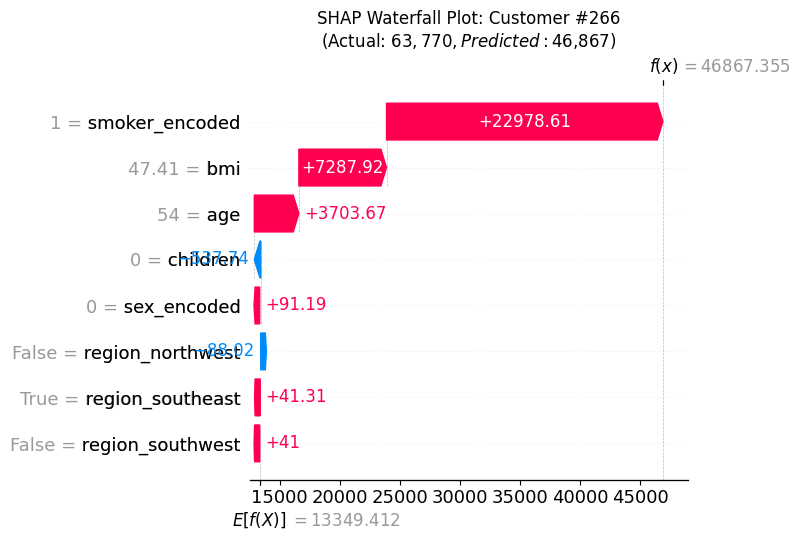

In [13]:
# ============================================
# 3. WATERFALL PLOT (Single Prediction)
# ============================================

print("\n" + "="*60)
print("WATERFALL PLOT: Visualizing Feature Contributions")
print("="*60)

# Create SHAP Explanation object for plotting
shap_explanation = shap.Explanation(
    values=shap_values[sample_idx],
    base_values=base_value,
    data=X_test[sample_idx],
    feature_names=feature_cols
)

plt.figure(figsize=(10, 6))
shap.plots.waterfall(shap_explanation, max_display=10, show=False)
plt.title(f"SHAP Waterfall Plot: Customer #{sample_idx}\n(Actual: ${sample_actual:,.0f}, Predicted: ${sample_prediction:,.0f})")
plt.tight_layout()
plt.show()


FORCE PLOT: Another View of Feature Contributions


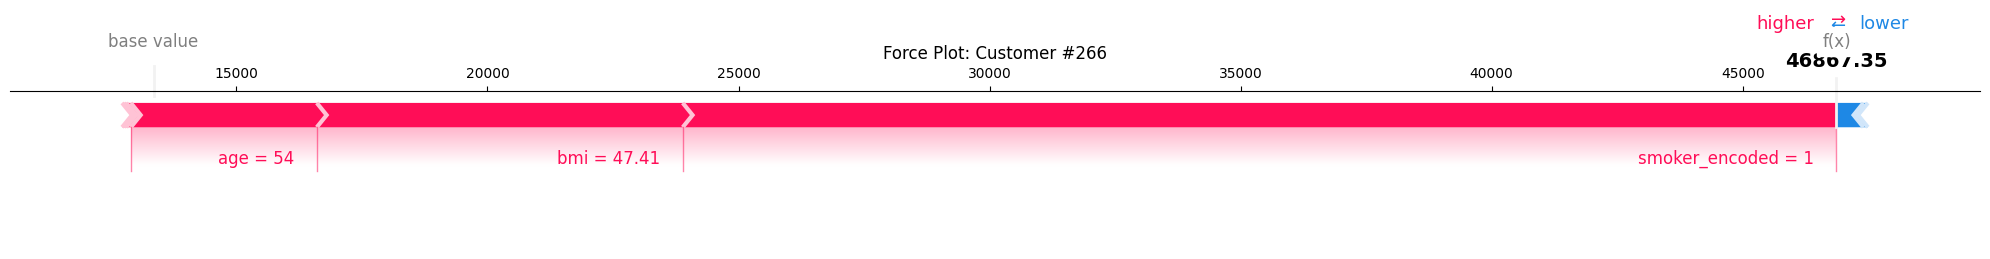

In [14]:
# ============================================
# 4. FORCE PLOT (Alternative Single Prediction Viz)
# ============================================

print("\n" + "="*60)
print("FORCE PLOT: Another View of Feature Contributions")
print("="*60)

# Force plot shows push/pull of features
shap.initjs()  # Initialize JavaScript for interactive plots

# Create force plot
force_plot = shap.force_plot(
    base_value,
    shap_values[sample_idx],
    X_test[sample_idx],
    feature_names=feature_cols,
    matplotlib=True,
    show=False
)
plt.title(f"Force Plot: Customer #{sample_idx}")
plt.tight_layout()
plt.show()

In [15]:
# ============================================
# 5. GLOBAL FEATURE IMPORTANCE (MEAN |SHAP|)
# ============================================

print("\n" + "="*60)
print("GLOBAL FEATURE IMPORTANCE: Mean Absolute SHAP Values")
print("="*60)

# Calculate mean absolute SHAP value for each feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)

shap_importance = pd.DataFrame({
    'feature': feature_cols,
    'mean_abs_shap': mean_abs_shap
}).sort_values('mean_abs_shap', ascending=False)

print(shap_importance.to_string(index=False))

# Compare to Random Forest feature importance
print("\n" + "="*60)
print("COMPARISON: SHAP vs RF Feature Importance")
print("="*60)

comparison_df = pd.DataFrame({
    'Feature': feature_cols,
    'RF Importance': rf_default.feature_importances_,
    'SHAP Importance': mean_abs_shap / mean_abs_shap.sum()  # Normalize
})

comparison_df = comparison_df.sort_values('SHAP Importance', ascending=False)
print(comparison_df.to_string(index=False))


GLOBAL FEATURE IMPORTANCE: Mean Absolute SHAP Values
         feature  mean_abs_shap
  smoker_encoded    7709.174579
             age    3326.481234
             bmi    2149.068625
        children     714.679436
     sex_encoded     173.998660
region_southwest     141.697269
region_northwest     125.428332
region_southeast     106.181837

COMPARISON: SHAP vs RF Feature Importance
         Feature  RF Importance  SHAP Importance
  smoker_encoded       0.608618         0.533628
             age       0.134135         0.230259
             bmi       0.216661         0.148758
        children       0.019370         0.049470
     sex_encoded       0.006358         0.012044
region_southwest       0.003922         0.009808
region_northwest       0.005606         0.008682
region_southeast       0.005331         0.007350



SUMMARY PLOT: Global Feature Effects


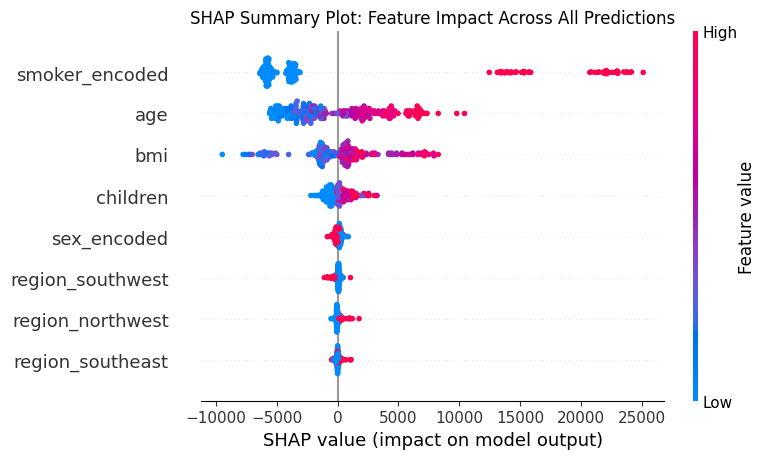


How to read the beeswarm plot:
‚Ä¢ Y-axis: Features (ordered by importance)
‚Ä¢ X-axis: SHAP value (impact on prediction)
‚Ä¢ Color: Feature value (red=high, blue=low)
‚Ä¢ Each dot: One customer

Example insights:
‚Ä¢ If red dots are on the right ‚Üí high feature value increases prediction
‚Ä¢ If blue dots are on the left ‚Üí low feature value decreases prediction


In [16]:
# ============================================
# 6. SUMMARY PLOT (Beeswarm)
# ============================================

print("\n" + "="*60)
print("SUMMARY PLOT: Global Feature Effects")
print("="*60)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, feature_names=feature_cols, show=False)
plt.title("SHAP Summary Plot: Feature Impact Across All Predictions")
plt.tight_layout()
plt.show()

print("\nHow to read the beeswarm plot:")
print("‚Ä¢ Y-axis: Features (ordered by importance)")
print("‚Ä¢ X-axis: SHAP value (impact on prediction)")
print("‚Ä¢ Color: Feature value (red=high, blue=low)")
print("‚Ä¢ Each dot: One customer")
print("\nExample insights:")
print("‚Ä¢ If red dots are on the right ‚Üí high feature value increases prediction")
print("‚Ä¢ If blue dots are on the left ‚Üí low feature value decreases prediction")


DEPENDENCE PLOT: How Features Affect Predictions


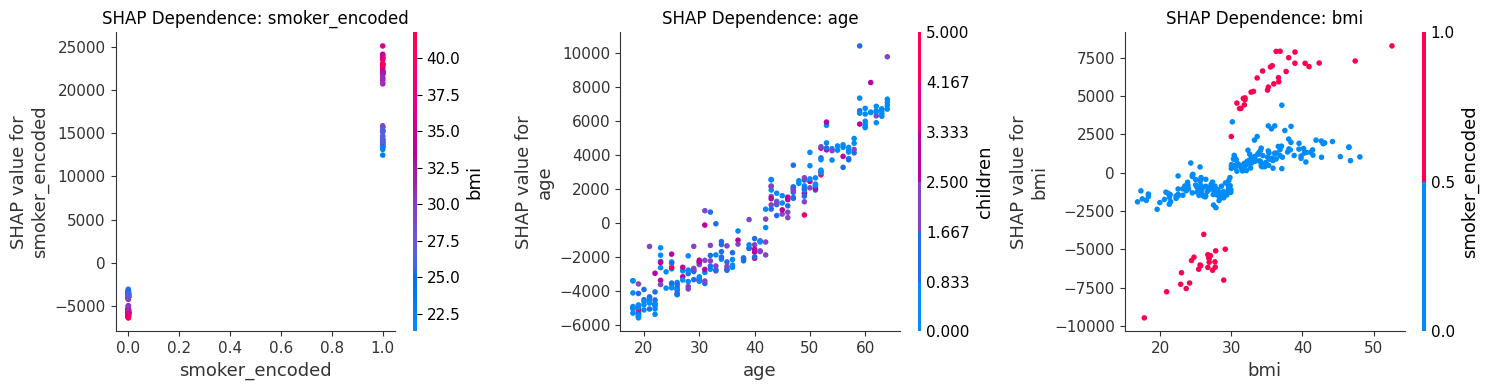


How to read dependence plots:
‚Ä¢ X-axis: Feature value
‚Ä¢ Y-axis: SHAP value (impact on prediction)
‚Ä¢ Color: Another feature (auto-selected interaction)
‚Ä¢ Shows non-linear relationships and interactions!


In [17]:
# ============================================
# 7. DEPENDENCE PLOT (Feature Interaction)
# ============================================

print("\n" + "="*60)
print("DEPENDENCE PLOT: How Features Affect Predictions")
print("="*60)

# Pick top features to explore
top_features = shap_importance['feature'].head(3).tolist()

fig, axes = plt.subplots(1, len(top_features), figsize=(15, 4))

for idx, feature in enumerate(top_features):
    feature_idx = feature_cols.index(feature)
    
    ax = axes[idx] if len(top_features) > 1 else axes
    shap.dependence_plot(
        feature_idx,
        shap_values,
        X_test,
        feature_names=feature_cols,
        ax=ax,
        show=False
    )
    ax.set_title(f"SHAP Dependence: {feature}")

plt.tight_layout()
plt.show()

print("\nHow to read dependence plots:")
print("‚Ä¢ X-axis: Feature value")
print("‚Ä¢ Y-axis: SHAP value (impact on prediction)")
print("‚Ä¢ Color: Another feature (auto-selected interaction)")
print("‚Ä¢ Shows non-linear relationships and interactions!")

In [18]:
# ============================================
# 8. COMPARE MULTIPLE CUSTOMERS
# ============================================

print("\n" + "="*60)
print("COMPARING MULTIPLE PREDICTIONS")
print("="*60)

# Select diverse customers
low_cost_idx = np.argmin(y_test)
high_cost_idx = np.argmax(y_test)
median_idx = np.argsort(y_test)[len(y_test)//2]

sample_indices = [low_cost_idx, median_idx, high_cost_idx]
sample_names = ['Low Cost', 'Median Cost', 'High Cost']

for idx, name in zip(sample_indices, sample_names):
    pred = rf_default.predict([X_test[idx]])[0]
    actual = y_test[idx]
    
    print(f"\n{name} Customer:")
    print(f"  Actual: ${actual:,.2f}, Predicted: ${pred:,.2f}")
    
    # Top 3 contributing features
    shap_sample = shap_values[idx]
    top_contributors = np.argsort(np.abs(shap_sample))[-3:][::-1]
    
    print(f"  Top contributors:")
    for feat_idx in top_contributors:
        print(f"    {feature_cols[feat_idx]:20s}: {shap_sample[feat_idx]:+10,.2f}")


COMPARING MULTIPLE PREDICTIONS

Low Cost Customer:
  Actual: $1,131.51, Predicted: $7,119.89
  Top contributors:
    smoker_encoded      :  -5,384.67
    age                 :  -3,409.40
    bmi                 :  +3,319.91

Median Cost Customer:
  Actual: $8,547.69, Predicted: $10,273.96
  Top contributors:
    smoker_encoded      :  -3,923.54
    age                 :  +2,072.10
    bmi                 :  -1,309.48

High Cost Customer:
  Actual: $63,770.43, Predicted: $46,867.35
  Top contributors:
    smoker_encoded      : +22,978.61
    bmi                 :  +7,287.92
    age                 :  +3,703.67



DECISION PLOT: Comparing Customer Journeys


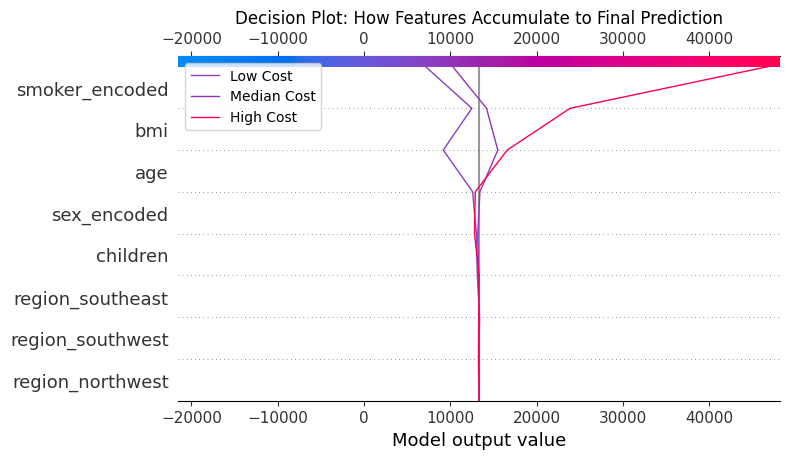


How to read decision plots:
‚Ä¢ X-axis: Model output (prediction)
‚Ä¢ Y-axis: Features (bottom to top)
‚Ä¢ Lines: Each customer's 'journey' from base to final prediction
‚Ä¢ Shows how features accumulate to reach the final prediction!


In [19]:
# ============================================
# 9. DECISION PLOT (Multiple Customers)
# ============================================

print("\n" + "="*60)
print("DECISION PLOT: Comparing Customer Journeys")
print("="*60)

plt.figure(figsize=(12, 6))
shap.decision_plot(
    base_value,
    shap_values[sample_indices],
    X_test[sample_indices],
    feature_names=feature_cols,
    legend_labels=sample_names,
    show=False
)
plt.title("Decision Plot: How Features Accumulate to Final Prediction")
plt.tight_layout()
plt.show()

print("\nHow to read decision plots:")
print("‚Ä¢ X-axis: Model output (prediction)")
print("‚Ä¢ Y-axis: Features (bottom to top)")
print("‚Ä¢ Lines: Each customer's 'journey' from base to final prediction")
print("‚Ä¢ Shows how features accumulate to reach the final prediction!")

### Task 1: Understanding SHAP Values

For the single prediction you analyzed:
- Which features pushed the prediction UP the most?
- Which pushed it DOWN?
- Do the SHAP values sum to (prediction - base_value)?
- Does the explanation make intuitive sense?


Compare SHAP importance to RF feature importance:
- Are the rankings similar or different?
- Any surprises?
- Why might they differ?

### Task 2: Reading the Plots

Beeswarm plot (summary plot):
- For smoker_encoded: Are red dots (smokers) on the right or left?
- What does this tell you?
- For age: Is the relationship linear or non-linear?
- How can you tell?

    Check linearity via the dependence plots, specifically what are the distribution amongst those in the same category? i.e. are there + and - SHAP values for those within the same feature values (e.g. within small BMI values)?

Dependence plot for BMI:
- Is the effect linear or non-linear?
- What's the interaction feature (shown in color)?
- Does BMI interact with that feature?

Decision plot:
- Trace the "High Cost" customer's journey
- Which feature made the biggest jump?
- Compare to "Low Cost" - where do they diverge?

### Task 3: Business Communication <br>
Imagine explaining to a customer why their premium is high:
"Your premium is $35,000 (vs average of $13,000). Here's why:

[Feature 1]: contributes $X because [reason]
[Feature 2]: contributes $Y because [reason]
[Feature 3]: contributes $Z because [reason]

Good news: If you [actionable recommendation], your premium could decrease by approximately $[amount]."
Fill this in using SHAP values from a high-cost customer!

### Task 4: Critical Thinking

- When would SHAP be better than feature importance? Give 2 specific scenario
    - Individual prediction explanation ‚úÖ
    - Directional impact visualization ‚úÖ
    - Debugging model failures: "Why did the model get THIS prediction wrong?"
    - Regulatory compliance: "Prove your model isn't discriminatory"
    - Model comparison: "Did the new model learn the same patterns?"
    - Customer disputes: "Show me why my premium is higher than my neighbor's"
    - Feature engineering: "Which feature interactions matter?"

- SHAP limitations:
    - It's slow to compute (tree explainer is fast, but others aren't)
    - What are the tradeoffs in production?

        TIER 1: Batch Predictions (Daily)
        - 100,000 customers
        - Use RF predictions only
        - No SHAP (too slow)
        - Output: customer_id, predicted_premium

        TIER 2: Sample Analysis (Weekly)
        - Random sample of 5,000 customers
        - Compute SHAP values
        - Store in database for lookups
        - Monitor for drift/fairness

        TIER 3: On-Demand Explanations (Real-time)
        - Customer calls: "Why is my premium $X?"
        - Check if SHAP pre-computed (database lookup)
        - If not: Compute on-the-fly (TreeExplainer is fast!)
        - Cache result for future

        TIER 4: Regulatory Audits (Quarterly)
        - Full SHAP analysis on entire dataset
        - Generate fairness reports
        - Archive for compliance
        **Trade-off table:**

        | Approach | Speed | Coverage | Use Case |
        |----------|-------|----------|----------|
        | **No SHAP** | ‚ö°‚ö°‚ö°‚ö°‚ö° Fast | 100% | Batch pricing |
        | **Sample SHAP** | ‚ö°‚ö°‚ö°‚ö° Fast | 5-10% | Monitoring |
        | **On-demand** | ‚ö°‚ö°‚ö° Medium | As needed | Customer service |
        | **Full SHAP** | ‚ö° Slow | 100% | Audits |

- Fairness implications:
    - If SHAP shows sex contributes significantly, is that legal/ethical? How would you handle this?
        "If SHAP shows a protected attribute like sex contributing significantly, that's a red flag. First, I'd verify we're not violating regulations‚Äîfor health insurance in the US, using sex for pricing is illegal under the ACA. Second, I'd check for proxy discrimination‚Äîeven if we remove sex directly, features like occupation or zip code might correlate with it. Third, I'd use fairness metrics like demographic parity and equalized odds to audit the model. Finally, I'd consult legal counsel before deployment. In regulated industries, explainability isn't just nice-to-have‚Äîit's essential for compliance."


# Gradient Boosting

GRADIENT BOOSTING REGRESSOR

BASIC GRADIENT BOOSTING

Gradient Boosting (default):
  Training time: 0.05 seconds
  Train RMSE:    $3,806.38
  Test RMSE:     $4,331.18
  Train R¬≤:      0.8996
  Test R¬≤:       0.8792

MODEL COMPARISON
                Model  Test RMSE ($)  Test R¬≤ Training Time (s)
    Gradient Boosting    4331.181281 0.879167               0.1
        Random Forest    4575.185844 0.865169               5.0
Single Tree (depth=4)    4592.764310 0.864131                <1

TUNING: LEARNING RATE EFFECT
LR=0.01 ‚Üí Train R¬≤: 0.7438, Test R¬≤: 0.7501, Gap: -0.0063
LR=0.05 ‚Üí Train R¬≤: 0.8817, Test R¬≤: 0.8812, Gap: 0.0005
LR=0.10 ‚Üí Train R¬≤: 0.8996, Test R¬≤: 0.8792, Gap: 0.0205
LR=0.20 ‚Üí Train R¬≤: 0.9220, Test R¬≤: 0.8686, Gap: 0.0534
LR=0.50 ‚Üí Train R¬≤: 0.9564, Test R¬≤: 0.8462, Gap: 0.1103


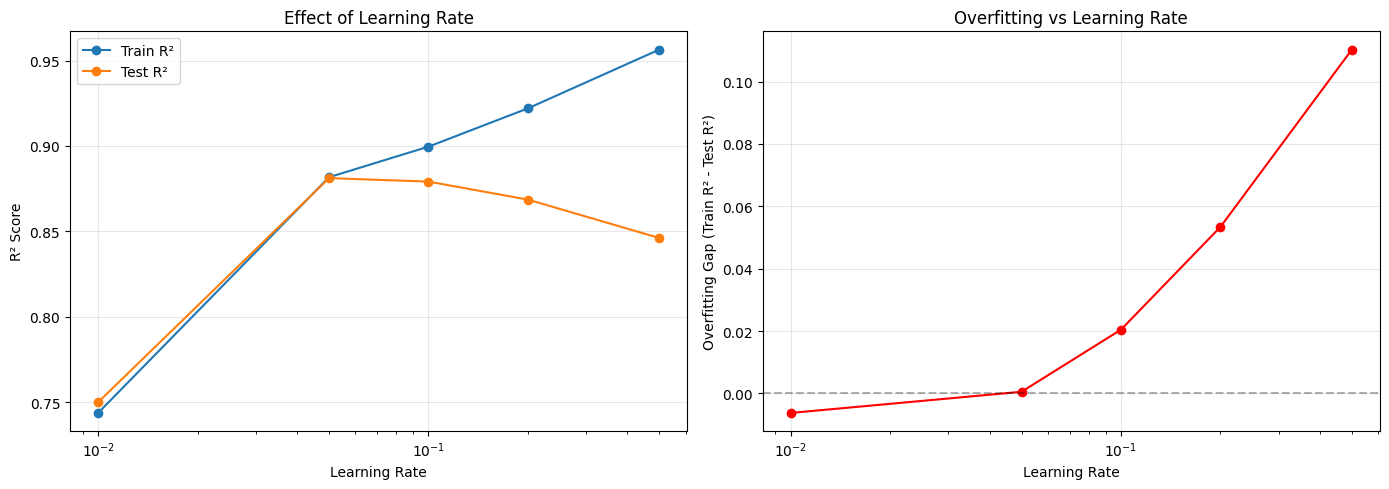


TUNING: NUMBER OF TREES (with Early Stopping)

Early stopping engaged at iteration: 45
(Model stopped before reaching 500 trees)


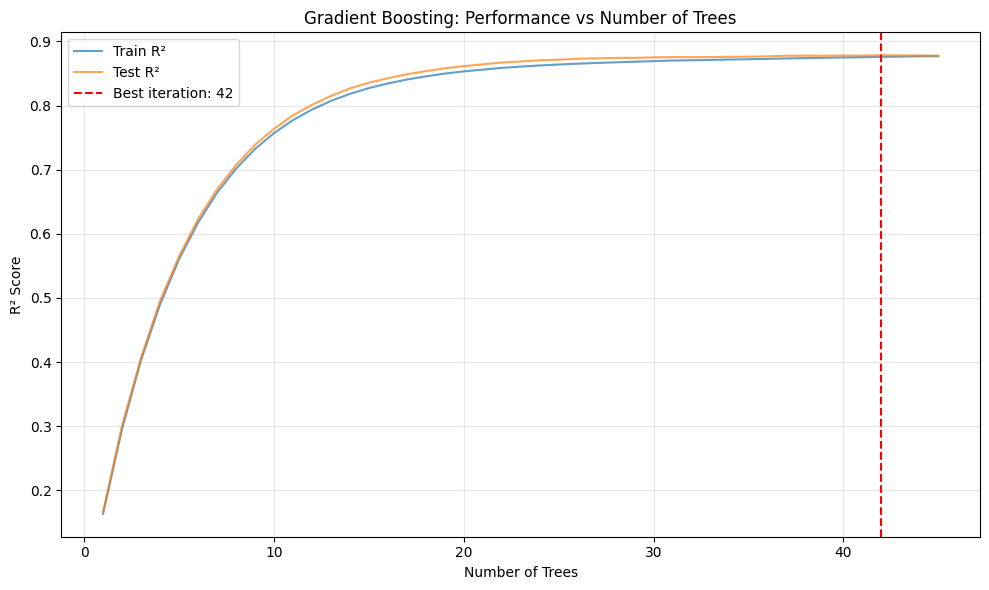


Best test R¬≤ achieved at iteration: 42
Best test R¬≤: 0.8784

FEATURE IMPORTANCE
         feature  importance
  smoker_encoded    0.676618
             bmi    0.190482
             age    0.118372
        children    0.010089
region_northwest    0.001784
region_southwest    0.001378
     sex_encoded    0.000750
region_southeast    0.000526


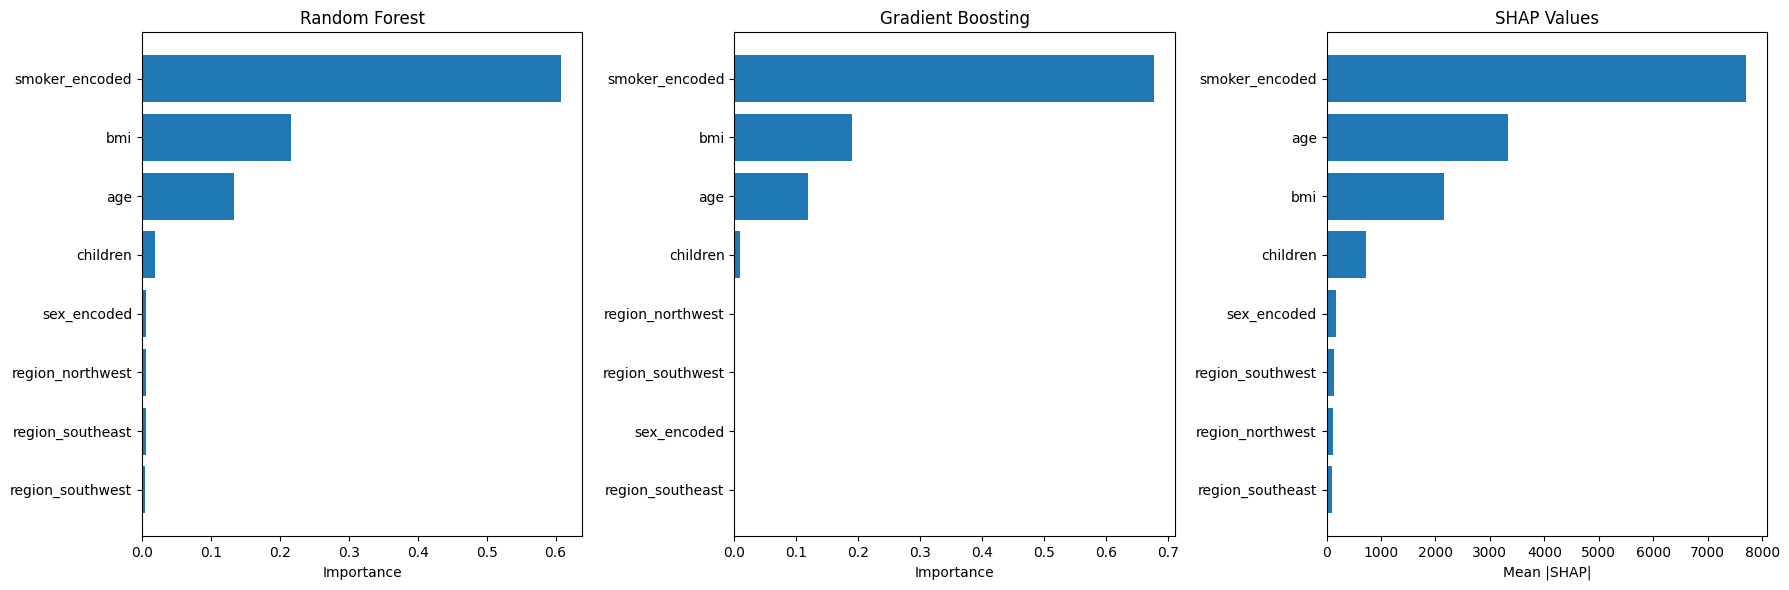


LEARNING CURVES: Diagnosing Bias vs Variance


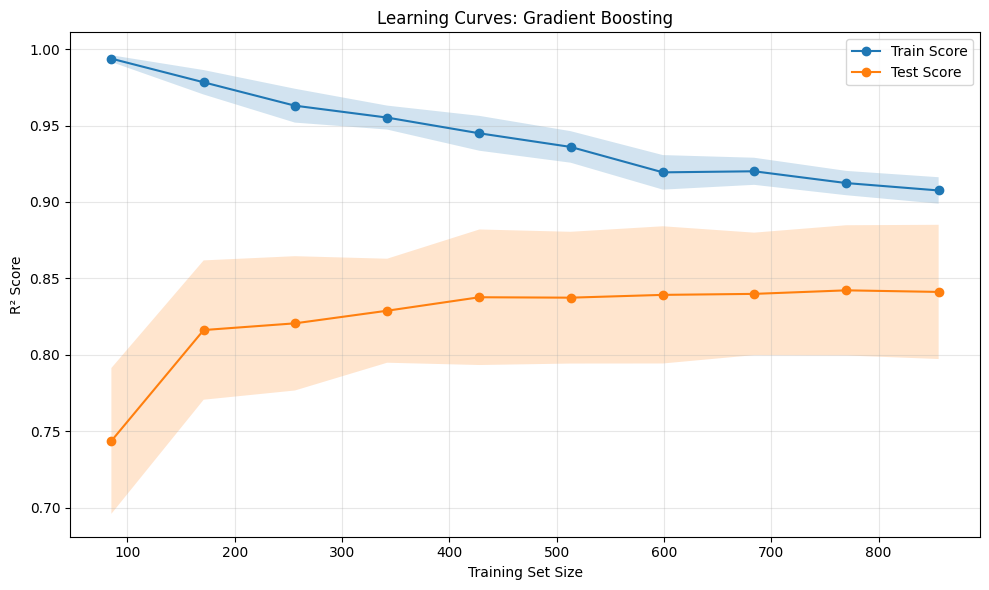


Learning curve interpretation:
‚Ä¢ If train & test scores converge at high value ‚Üí Good!
‚Ä¢ If large gap ‚Üí Overfitting (high variance)
‚Ä¢ If both scores low ‚Üí Underfitting (high bias)
‚Ä¢ If test score increases with more data ‚Üí Need more data!


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
import time

print("="*60)
print("GRADIENT BOOSTING REGRESSOR")
print("="*60)

# ============================================
# 1. BASELINE: GRADIENT BOOSTING (SKLEARN)
# ============================================

print("\n" + "="*60)
print("BASIC GRADIENT BOOSTING")
print("="*60)

# Start with default parameters
gbm_default = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train and time it
start_time = time.time()
gbm_default.fit(X_train, y_train)
train_time = time.time() - start_time

# Predictions
y_pred_train_gbm = gbm_default.predict(X_train)
y_pred_test_gbm = gbm_default.predict(X_test)

# Metrics
train_rmse_gbm = np.sqrt(mean_squared_error(y_train, y_pred_train_gbm))
test_rmse_gbm = np.sqrt(mean_squared_error(y_test, y_pred_test_gbm))
train_r2_gbm = r2_score(y_train, y_pred_train_gbm)
test_r2_gbm = r2_score(y_test, y_pred_test_gbm)

print(f"\nGradient Boosting (default):")
print(f"  Training time: {train_time:.2f} seconds")
print(f"  Train RMSE:    ${train_rmse_gbm:,.2f}")
print(f"  Test RMSE:     ${test_rmse_gbm:,.2f}")
print(f"  Train R¬≤:      {train_r2_gbm:.4f}")
print(f"  Test R¬≤:       {test_r2_gbm:.4f}")

# ============================================
# 2. COMPARE TO PREVIOUS MODELS
# ============================================

print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

comparison = pd.DataFrame({
    'Model': [
        'Single Tree (depth=4)',
        'Random Forest',
        'Gradient Boosting'
    ],
    'Test RMSE ($)': [
        test_rmse_optimal,
        rmse_rf,
        test_rmse_gbm
    ],
    'Test R¬≤': [
        test_r2_optimal,
        r2_rf,
        test_r2_gbm
    ],
    'Training Time (s)': [
        '<1',
        f'{5:.1f}',  # Approximate
        f'{train_time:.1f}'
    ]
})

comparison = comparison.sort_values('Test R¬≤', ascending=False)
print(comparison.to_string(index=False))

# ============================================
# 3. EFFECT OF LEARNING RATE
# ============================================

print("\n" + "="*60)
print("TUNING: LEARNING RATE EFFECT")
print("="*60)

learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
lr_results = []

for lr in learning_rates:
    gbm_lr = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=lr,
        max_depth=3,
        random_state=42
    )
    
    gbm_lr.fit(X_train, y_train)
    
    train_score = r2_score(y_train, gbm_lr.predict(X_train))
    test_score = r2_score(y_test, gbm_lr.predict(X_test))
    
    lr_results.append({
        'learning_rate': lr,
        'train_r2': train_score,
        'test_r2': test_score,
        'gap': train_score - test_score
    })
    
    print(f"LR={lr:.2f} ‚Üí Train R¬≤: {train_score:.4f}, Test R¬≤: {test_score:.4f}, Gap: {train_score - test_score:.4f}")

lr_df = pd.DataFrame(lr_results)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(lr_df['learning_rate'], lr_df['train_r2'], marker='o', label='Train R¬≤')
axes[0].plot(lr_df['learning_rate'], lr_df['test_r2'], marker='o', label='Test R¬≤')
axes[0].set_xlabel('Learning Rate')
axes[0].set_ylabel('R¬≤ Score')
axes[0].set_title('Effect of Learning Rate')
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[0].set_xscale('log')

axes[1].plot(lr_df['learning_rate'], lr_df['gap'], marker='o', color='red')
axes[1].set_xlabel('Learning Rate')
axes[1].set_ylabel('Overfitting Gap (Train R¬≤ - Test R¬≤)')
axes[1].set_title('Overfitting vs Learning Rate')
axes[1].grid(alpha=0.3)
axes[1].set_xscale('log')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 4. EFFECT OF NUMBER OF TREES
# ============================================

print("\n" + "="*60)
print("TUNING: NUMBER OF TREES (with Early Stopping)")
print("="*60)

# Train with many trees, track validation performance
gbm_many_trees = GradientBoostingRegressor(
    n_estimators=500,  # More than we need
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    validation_fraction=0.2,  # Hold out 20% for validation
    n_iter_no_change=20,  # Stop if no improvement for 20 iterations
    tol=0.0001  # Tolerance for improvement
)

gbm_many_trees.fit(X_train, y_train)

print(f"\nEarly stopping engaged at iteration: {gbm_many_trees.n_estimators_}")
print(f"(Model stopped before reaching 500 trees)")

# Plot training progress
train_scores = []
test_scores = []

for i, (train_pred, test_pred) in enumerate(zip(
    gbm_many_trees.staged_predict(X_train),
    gbm_many_trees.staged_predict(X_test)
)):
    train_scores.append(r2_score(y_train, train_pred))
    test_scores.append(r2_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_scores)+1), train_scores, label='Train R¬≤', alpha=0.7)
plt.plot(range(1, len(test_scores)+1), test_scores, label='Test R¬≤', alpha=0.7)
plt.axvline(x=np.argmax(test_scores)+1, color='red', linestyle='--', 
            label=f'Best iteration: {np.argmax(test_scores)+1}')
plt.xlabel('Number of Trees')
plt.ylabel('R¬≤ Score')
plt.title('Gradient Boosting: Performance vs Number of Trees')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nBest test R¬≤ achieved at iteration: {np.argmax(test_scores)+1}")
print(f"Best test R¬≤: {max(test_scores):.4f}")

# ============================================
# 5. FEATURE IMPORTANCE
# ============================================

print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)

feature_importance_gbm = pd.DataFrame({
    'feature': feature_cols,
    'importance': gbm_default.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance_gbm.to_string(index=False))

# Compare across methods
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Random Forest
axes[0].barh(feature_importance_rf['feature'], feature_importance_rf['importance'])
axes[0].set_xlabel('Importance')
axes[0].set_title('Random Forest')
axes[0].invert_yaxis()

# Gradient Boosting
axes[1].barh(feature_importance_gbm['feature'], feature_importance_gbm['importance'])
axes[1].set_xlabel('Importance')
axes[1].set_title('Gradient Boosting')
axes[1].invert_yaxis()

# SHAP (mean absolute)
axes[2].barh(shap_importance['feature'], shap_importance['mean_abs_shap'])
axes[2].set_xlabel('Mean |SHAP|')
axes[2].set_title('SHAP Values')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

# ============================================
# 6. LEARNING CURVES (Diagnose Bias/Variance)
# ============================================

print("\n" + "="*60)
print("LEARNING CURVES: Diagnosing Bias vs Variance")
print("="*60)

train_sizes, train_scores, test_scores = learning_curve(
    gbm_default,
    X_train,
    y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2'
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', label='Train Score')
plt.plot(train_sizes, test_mean, marker='o', label='Test Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('R¬≤ Score')
plt.title('Learning Curves: Gradient Boosting')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nLearning curve interpretation:")
print("‚Ä¢ If train & test scores converge at high value ‚Üí Good!")
print("‚Ä¢ If large gap ‚Üí Overfitting (high variance)")
print("‚Ä¢ If both scores low ‚Üí Underfitting (high bias)")
print("‚Ä¢ If test score increases with more data ‚Üí Need more data!")

## Task 1: Performance Analysis

1. How does GBM compare to Random Forest?
- Better, worse, or similar?

    GBM performed better than Random forest, with around 1.6% improvement.

- Is the improvement worth the complexity?

    "GBM improved accuracy by 1.6% over Random Forest, which translates to $100 less error per customer or $1M annually for 10,000 customers. The 'complexity' argument doesn't hold‚Äîboth are tree ensembles with similar training/inference times. GBM requires more hyperparameter tuning (learning rate, depth), but modern tools (GridSearchCV, Optuna) automate this. I'd recommend GBM for production unless interpretability is the PRIMARY concern (then use GAM + SHAP)."

**The real trade-off isn't complexity‚Äîit's:**
- GBM: Slightly better accuracy, more tuning needed
- RF: Slightly lower accuracy, more robust to bad hyperparameters
2. From the learning rate experiment:
- Which learning rate performed best?
    The learning rate 0.05 performed the best!
- What happens with very high LR (0.5)?
    As LR increases, the gap between the train R2 and test r2 also increases and in this case it seems that the training R2 is around 0.956 while the test r2 is only 0.8462, which is less than the best test r2 at 0.8812
- What happens with very low LR (0.01)?
    Low LRs implies that each tree contributes very little (0.01 √ó prediction), so compared to higher learning rates, the number of trees needed to obtain improved performance for low LR is higher and will imply longer training time.

3. From the number of trees plot:
- Does test performance keep improving indefinitely?
    there was a big jump in r2 score up to 10 trees, then there seems to be diminishing returns from 10 to 30 trees, and finally marginal improvement from 30 trees onwards
- At what point does it plateau/degrade?
    The test performance plateued around 30 trees
- Is there overfitting as trees increase?
    from the graph, there does not seem to be any overfitting as the test performance does not decrease with an incresingly better train r2.

## Task 2: Understanding Hyperparameters
Scenario: Your GBM is overfitting (Train R¬≤ = 0.95, Test R¬≤ = 0.75)
Question: Which hyperparameters would you adjust and how?
- Learning rate: increase or decrease? Decrease the learning rate
- Max depth: increase or decrease? Decrease the max depth
- Number of trees: increase or decrease? Use early stopping with validation set to have the model pick the number of trees for us. If overfitting persists, use L1/L2 regularization 
- Subsample: what value? Between 0.5 and 1.0 so we only use a subset of the training data every time we train the trees so it doesn't overfit the training data!

## Task 3: Feature Importance Comparison
1. Compare RF vs GBM vs SHAP importance:
- Are they similar? Random forest and gradient boosting seem to have more similar feature importance with the top 3 features (in descending order) smoker_encoded, bmi, age. Meanwhile the SHAP values are smoker_encoded, age, bmmi
- Any major differences? No major differences, but I note that the importance of the smoker encoded is higher in gradient boosting compared to smoker_encoded, while the bmi and age importance seems to be less than the importance of the same variables in random forest

    This is most likely because: in GBM:
    - Trees are sequential
    - First tree heavily uses smoker (biggest error reduction)
    - Subsequent trees refine smoker's effect further
    - Smoker gets "credit" in multiple trees
    - Importance more concentrated on top features

- Which do you trust most?
    Based on the high test r2, i think i would trust the gradient boosting feature importance, especially if we also set colsample_bytree < 1.

    "I trust SHAP most for feature importance because it's theoretically grounded (Shapley values) and unbiased. RF/GBM importance can be biased toward high-cardinality features. However, for quick exploration during model development, GBM's built-in importance is fine‚Äîjust verify with SHAP before making business decisions. In production, I'd report SHAP values to stakeholders."

2. Why might they differ?
They differ because gradient boosting is trying to minimize the loss of the residuals, while random forest is trying to maximize the Mean Decrease Impurity for every split, while SHAP values only show the relative effect of each feature towards the target variable.



## Task 4: Business Communication
Frame for your CFO:
"We tested Gradient Boosting, the industry-standard algorithm used by companies like Google and Amazon. Compared to Random Forest:

Accuracy improvement: 1.6% improvement
Training time: 0.14 seconds (vs 0.1 ish for RF), quite similar
Recommendation: Use GBM because there doesnt seem to be an increase in time complexity for training and inference compared to RF and if we highly care about the accuracy of our prediction, I believe that GBM will give the best accuracy compared to RF. Finally, if you are worried about explainability of the model, we can still use the SHAP values for explainability."

# XGBoost, LightGBM and CatBoost

In [25]:
# Install if needed
# !pip install xgboost lightgbm catboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import time
import warnings
warnings.filterwarnings('ignore')

# Import all three libraries
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

print("="*60)
print("XGBOOST vs LIGHTGBM vs CATBOOST")
print("="*60)

# ============================================
# 1. XGBOOST (Industry Standard)
# ============================================

print("\n" + "="*60)
print("XGBOOST")
print("="*60)

# Train with default parameters first
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
xgb_model.fit(X_train, y_train)
xgb_train_time = time.time() - start_time

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Metrics
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"\nXGBoost (default params):")
print(f"  Training time: {xgb_train_time:.2f}s")
print(f"  Test RMSE:     ${xgb_rmse:,.2f}")
print(f"  Test R¬≤:       {xgb_r2:.4f}")

# ============================================
# 2. LIGHTGBM (Fastest)
# ============================================

print("\n" + "="*60)
print("LIGHTGBM")
print("="*60)

# Train with default parameters
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    n_jobs=-1,
    verbose=-1  # Suppress warnings
)

start_time = time.time()
lgb_model.fit(X_train, y_train)
lgb_train_time = time.time() - start_time

# Predictions
y_pred_lgb = lgb_model.predict(X_test)

# Metrics
lgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
lgb_r2 = r2_score(y_test, y_pred_lgb)

print(f"\nLightGBM (default params):")
print(f"  Training time: {lgb_train_time:.2f}s")
print(f"  Test RMSE:     ${lgb_rmse:,.2f}")
print(f"  Test R¬≤:       {lgb_r2:.4f}")

# ============================================
# 3. CATBOOST (Best for Categorical)
# ============================================

print("\n" + "="*60)
print("CATBOOST")
print("="*60)

# For CatBoost, we can specify categorical features!
# Let's identify which features are categorical in our data
categorical_features_indices = [3, 4, 5, 6, 7]  # smoker, sex, region dummies

# Train with default parameters
cat_model = cb.CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    random_state=42,
    verbose=0  # Suppress output
)

start_time = time.time()
cat_model.fit(
    X_train, 
    y_train,
    cat_features=categorical_features_indices
)
cat_train_time = time.time() - start_time

# Predictions
y_pred_cat = cat_model.predict(X_test)

# Metrics
cat_rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))
cat_r2 = r2_score(y_test, y_pred_cat)

print(f"\nCatBoost (default params):")
print(f"  Training time: {cat_train_time:.2f}s")
print(f"  Test RMSE:     ${cat_rmse:,.2f}")
print(f"  Test R¬≤:       {cat_r2:.4f}")

# ============================================
# 4. COMPREHENSIVE COMPARISON
# ============================================

print("\n" + "="*60)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*60)

comparison = pd.DataFrame({
    'Model': [
        'Single Tree',
        'Random Forest',
        'Sklearn GBM',
        'XGBoost',
        'LightGBM',
        'CatBoost'
    ],
    'Test RMSE ($)': [
        test_rmse_optimal,
        rmse_rf,
        test_rmse_gbm,
        xgb_rmse,
        lgb_rmse,
        cat_rmse
    ],
    'Test R¬≤': [
        test_r2_optimal,
        r2_rf,
        test_r2_gbm,
        xgb_r2,
        lgb_r2,
        cat_r2
    ],
    'Training Time (s)': [
        '<0.1',
        '~0.1',
        f'{train_time:.2f}',
        f'{xgb_train_time:.2f}',
        f'{lgb_train_time:.2f}',
        f'{cat_train_time:.2f}'
    ]
})

comparison = comparison.sort_values('Test R¬≤', ascending=False)
print("\n" + comparison.to_string(index=False))

print(f"\nüèÜ Best Model: {comparison.iloc[0]['Model']}")
print(f"   Test R¬≤: {comparison.iloc[0]['Test R¬≤']:.4f}")
print(f"   Test RMSE: ${comparison.iloc[0]['Test RMSE ($)']:,.2f}")

XGBOOST vs LIGHTGBM vs CATBOOST

XGBOOST

XGBoost (default params):
  Training time: 0.08s
  Test RMSE:     $4,246.24
  Test R¬≤:       0.8839

LIGHTGBM

LightGBM (default params):
  Training time: 0.07s
  Test RMSE:     $4,287.30
  Test R¬≤:       0.8816

CATBOOST

CatBoost (default params):
  Training time: 0.01s
  Test RMSE:     $4,268.11
  Test R¬≤:       0.8827

COMPREHENSIVE MODEL COMPARISON

        Model  Test RMSE ($)  Test R¬≤ Training Time (s)
      XGBoost    4246.236274 0.883860              0.08
     CatBoost    4268.109482 0.882661              0.01
     LightGBM    4287.295382 0.881604              0.07
  Sklearn GBM    4331.181281 0.879167              0.05
Random Forest    4575.185844 0.865169              ~0.1
  Single Tree    4592.764310 0.864131              <0.1

üèÜ Best Model: XGBoost
   Test R¬≤: 0.8839
   Test RMSE: $4,246.24



FEATURE IMPORTANCE COMPARISON


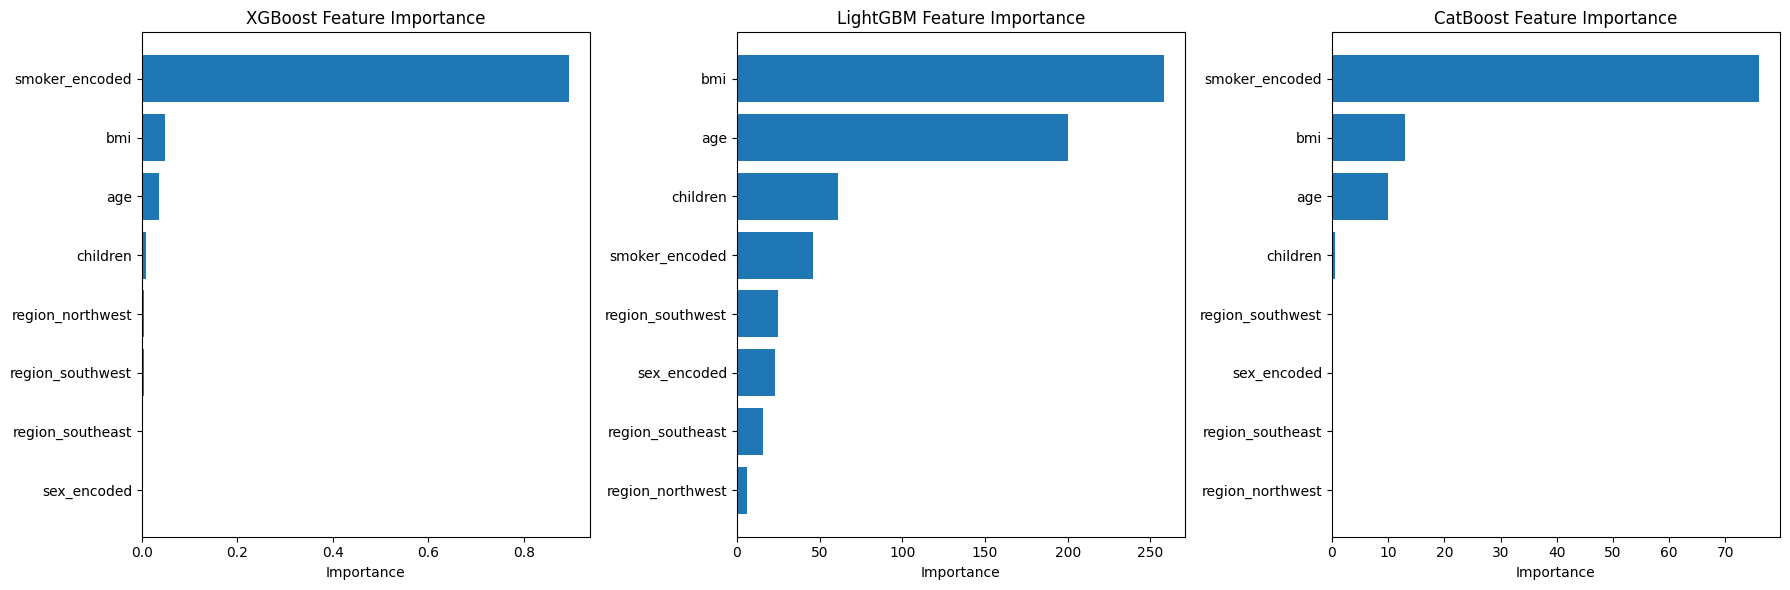

In [26]:
# ============================================
# 5. FEATURE IMPORTANCE COMPARISON
# ============================================

print("\n" + "="*60)
print("FEATURE IMPORTANCE COMPARISON")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# XGBoost
xgb_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=True)

axes[0].barh(xgb_importance['feature'], xgb_importance['importance'])
axes[0].set_xlabel('Importance')
axes[0].set_title('XGBoost Feature Importance')

# LightGBM
lgb_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=True)

axes[1].barh(lgb_importance['feature'], lgb_importance['importance'])
axes[1].set_xlabel('Importance')
axes[1].set_title('LightGBM Feature Importance')

# CatBoost
cat_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': cat_model.feature_importances_
}).sort_values('importance', ascending=True)

axes[2].barh(cat_importance['feature'], cat_importance['importance'])
axes[2].set_xlabel('Importance')
axes[2].set_title('CatBoost Feature Importance')

plt.tight_layout()
plt.show()

In [27]:
# ============================================
# 6. HYPERPARAMETER TUNING (XGBoost Example)
# ============================================

print("\n" + "="*60)
print("HYPERPARAMETER TUNING: XGBoost")
print("="*60)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

print(f"\nSearching through {np.prod([len(v) for v in param_grid.values()])} combinations...")
print("(This may take a few minutes...)")

# Grid search with cross-validation
xgb_grid = GridSearchCV(
    xgb.XGBRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

start_time = time.time()
xgb_grid.fit(X_train, y_train)
grid_time = time.time() - start_time

print(f"\nGrid search completed in {grid_time:.1f} seconds")
print(f"\nBest parameters:")
for param, value in xgb_grid.best_params_.items():
    print(f"  {param}: {value}")

# Evaluate best model
best_xgb = xgb_grid.best_estimator_
y_pred_best = best_xgb.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
best_r2 = r2_score(y_test, y_pred_best)

print(f"\nBest XGBoost Performance:")
print(f"  Test RMSE: ${best_rmse:,.2f}")
print(f"  Test R¬≤:   {best_r2:.4f}")
print(f"  Improvement over default: {(xgb_rmse - best_rmse)/xgb_rmse*100:.2f}%")


HYPERPARAMETER TUNING: XGBoost

Searching through 243 combinations...
(This may take a few minutes...)

Grid search completed in 2.7 seconds

Best parameters:
  colsample_bytree: 1.0
  learning_rate: 0.05
  max_depth: 3
  n_estimators: 100
  subsample: 0.8

Best XGBoost Performance:
  Test RMSE: $4,280.04
  Test R¬≤:   0.8820
  Improvement over default: -0.80%


In [28]:
# ============================================
# 7. PREDICTION COMPARISON (Same Customer)
# ============================================

print("\n" + "="*60)
print("PREDICTION COMPARISON: Same Customer")
print("="*60)

# Pick a high-cost customer
sample_idx = np.argmax(y_test)
sample_features = X_test[sample_idx:sample_idx+1]
actual_charge = y_test[sample_idx]

print(f"\nCustomer Profile:")
for i, feat in enumerate(feature_cols):
    print(f"  {feat:20s}: {X_test[sample_idx, i]:.2f}")

print(f"\nActual Charge: ${actual_charge:,.2f}")
print(f"\nModel Predictions:")
print(f"  XGBoost:   ${xgb_model.predict(sample_features)[0]:,.2f}")
print(f"  LightGBM:  ${lgb_model.predict(sample_features)[0]:,.2f}")
print(f"  CatBoost:  ${cat_model.predict(sample_features)[0]:,.2f}")
print(f"  Sklearn GBM: ${gbm_default.predict(sample_features)[0]:,.2f}")
print(f"  Random Forest: ${rf_default.predict(sample_features)[0]:,.2f}")


PREDICTION COMPARISON: Same Customer

Customer Profile:
  age                 : 54.00
  bmi                 : 47.41
  children            : 0.00
  smoker_encoded      : 1.00
  sex_encoded         : 0.00
  region_northwest    : 0.00
  region_southeast    : 1.00
  region_southwest    : 0.00

Actual Charge: $63,770.43

Model Predictions:
  XGBoost:   $47,900.41
  LightGBM:  $47,891.35
  CatBoost:  $45,829.28
  Sklearn GBM: $47,786.25
  Random Forest: $46,867.35



EARLY STOPPING DEMONSTRATION

Best iteration: 31
Best score: 5251.4764


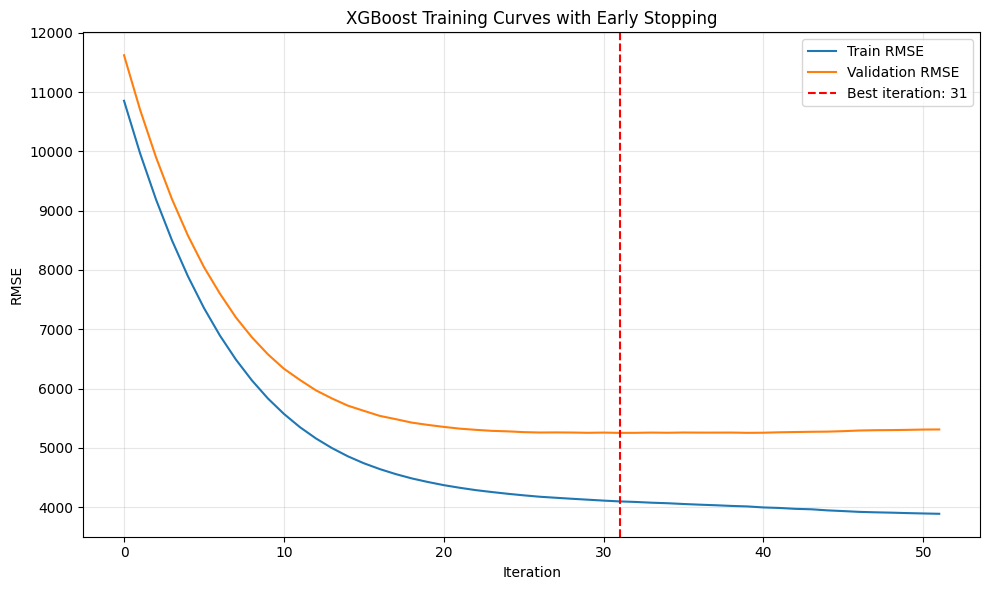

In [29]:
# ============================================
# 8. TRAINING CURVES (XGBoost with early stopping)
# ============================================

print("\n" + "="*60)
print("EARLY STOPPING DEMONSTRATION")
print("="*60)

# Split train into train + validation for early stopping
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# XGBoost with early stopping
xgb_early = xgb.XGBRegressor(
    n_estimators=500,  # More than we need
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse',
    early_stopping_rounds=20
)

xgb_early.fit(
    X_tr, y_tr,
    eval_set=[(X_tr, y_tr), (X_val, y_val)],
    verbose=False
)

print(f"\nBest iteration: {xgb_early.best_iteration}")
print(f"Best score: {xgb_early.best_score:.4f}")

# Plot training curves
results = xgb_early.evals_result()

plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['rmse'], label='Train RMSE')
plt.plot(results['validation_1']['rmse'], label='Validation RMSE')
plt.axvline(x=xgb_early.best_iteration, color='red', linestyle='--', 
            label=f'Best iteration: {xgb_early.best_iteration}')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('XGBoost Training Curves with Early Stopping')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Task 1: Performance Comparison

1. Which library performed best?
- Best R¬≤? The XGBoost has the best performing r2 score
- Fastest training? CatBoost has the fastest training time
- Best balance? I would think that CatBoost has the best balance as it has the fastest training time but also the second highest R2 score. 

Usually LightGBM is the fastest, with XGBoost and then Catboost being the slowest.

2. How much did tuning improve XGBoost?
- Default vs tuned performance. Actually the tuned XGBoost performed slightly worse than the default, a -0.8% improvement. I should most likely do a cross evaluation for a more robust hyperparameter tuning
- Was the grid search time worth it? In this case, it is not worth the grid search time as the improvement did not seem to have a positive impact.

In the future, we can try to increase the CV, use stratified (fold has the same proportionate representation of different classes as the full dataset) CV. Can also say:
"My grid search showed negative improvement, which suggests the tuned hyperparameters overfit to the validation folds. With only 1,338 samples, we don't have enough data for aggressive tuning. I'd recommend using XGBoost's default parameters or minimal tuning (just learning_rate and max_depth), validated with 5-10 fold CV instead of 3-fold."


3. Were the predictions consistent across libraries?
- For the same customer, did all models agree? Not all models agree with each other, with XGBoost, LightGBM and SKlearn having similar predictions between $47,780 and $47,900, while Random Forest predicted below this threshold at around $46,867 and CatBoost predicted an even lower prediction at $45,829.
- What does this tell you? This tells me that XGBoost and LightGBM have a similar and improved prediction over normal GBM and these two trees might have similar structures, while CatBoost and RandomForest is more conservative due to the algorithm's design.

RF is lower due to usage of Bagging (averaging of predictions), and cannot push predictions as high without overfitting so it tends to be conservative on outliers. For CatBoost, it handles categoricals differently, has symetric trees and is the most conservative predictor. Having a model underpredict outliers mean that we either need more feature, or consider separate models for high risk segments.

## Task 2: Understanding Differences

1. Why might LightGBM be faster?
- Think about leaf-wise vs level-wise growth
I believe that leaf wise growth in trees is faster than a level-wise growth as the algorithm only needs to consider the performance improvement of a model based on the additional leaf rather than an additional level in a tree (2^n considerations when considering an increase in the nth level).

LightGBM also employs histogram based splitting (splits on fewer points), uses GOSS (Gradient-based One-Side Sampling) and EFB (Exclusive Feature Bundling)

2. Why might CatBoost have different feature importance?
- It handles categoricals differently!
Actually in this case, the CatBoost Feature importance has the same ranking as XGBoost, while the feature importance for LightGBM is very different, with bmi, age and children being the top 3 most important feature and smoker_encoded being the 4th most important (compared to XGBoost and CatBoost where the smoker_encoded is the leading most important feature)

LightGBM's leaf wise growth priority finds the feature that gives the MAXIMUM gain on ANY split, in this case BMI migt have veryb high gain for specific subgroups (e.g. smokers with BMI > 30). In this case, we can interpret LightGBM's prediction of BMI as a being powerful for refining predictions. Validate the model interpretation further by using SHAP values.

3. When would you choose each library?
- XGBoost: when the data is clean and i want to have the best performance and do not mind spending a bit more time for hyperparameter tuning
- LightGBM: when I have a large amount of data and care more about model inference and training time (can fit over small data)
- CatBoost: when i have many categorical variables in my dataset, handles missing values best, but slowest in training


## Task 3: Hyperparameter Tuning Strategy
You have 2 hours to tune a model. What's your strategy?
- Option A: Grid search over all parameters
- Option B: Start with learning_rate & max_depth, then expand
- Option C: Use random search
- Option D: Use Bayesian optimization (Optuna)

Which would you choose and why?

I think I would use Option D and use a Bayesian optimization for a more direct hyperparameter tuning as subsequent hyperparameter choices is based on the results given by the previous hyperparameter tuning, compared to the other options where we have to do a systematic search by going through over all parameters or use random search. I think option B, of starting from learning_rate & max_depth will risk finding a local optimal solution rather than a global optimal solution since we will be limiting our search for other parameters based on the currently best learning_rate and max_depth.

## Task 4: Production Decision
Your company needs to deploy a model. Consider:

- Dataset: 100K customers, 50 features (10 categorical)
- Retraining: Weekly
- Inference: Real-time (< 100ms per prediction)
- Accuracy: Critical (affects $1M+ decisions)

Which library would you recommend and why?
Write a short recommendation (3-4 sentences).

Since the categorical variable is not much, relative to the other features, and the dataset is also not that many at around 100K, I think I will choose to use XGBoost since the algorithm should be able to easily handle a dataset of this scale and it is has proven to have the best performance over other models. The weekly retraining timeline also allows the model to have more time to explore and tune the hyperparameters to give the best predictions. Finally, since XGBoost is also optimized to predict very quickly, it can also be used for real time inference.

### Optuna Hyperparameter Tuning

In [31]:
# Optuna example for XGBoost
import optuna

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
    }
    
    model = xgb.XGBRegressor(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=7200)  # 2 hours

print(f"Best params: {study.best_params}")
print(f"Best CV score: {study.best_value}")

[I 2025-10-28 14:22:27,418] A new study created in memory with name: no-name-243459e4-9b58-4b01-b98c-f419c0bfb440
[I 2025-10-28 14:22:28,671] Trial 0 finished with value: 0.8044910704267952 and parameters: {'max_depth': 4, 'learning_rate': 0.1048506747562844, 'n_estimators': 222, 'subsample': 0.6164148288810226, 'colsample_bytree': 0.9716992974249544, 'reg_alpha': 6.880955608189196e-08, 'reg_lambda': 0.004522353853440483}. Best is trial 0 with value: 0.8044910704267952.
[I 2025-10-28 14:22:30,570] Trial 1 finished with value: 0.8279151853042327 and parameters: {'max_depth': 4, 'learning_rate': 0.04019195912178634, 'n_estimators': 356, 'subsample': 0.981802958718317, 'colsample_bytree': 0.8130758706735487, 'reg_alpha': 6.19195390091742e-08, 'reg_lambda': 4.2889042702443255e-05}. Best is trial 1 with value: 0.8279151853042327.
[I 2025-10-28 14:22:33,103] Trial 2 finished with value: 0.7768201458554536 and parameters: {'max_depth': 8, 'learning_rate': 0.22603342835581625, 'n_estimators': 

Best params: {'max_depth': 3, 'learning_rate': 0.01713999197540853, 'n_estimators': 312, 'subsample': 0.8221487069713723, 'colsample_bytree': 0.7849411026219479, 'reg_alpha': 5.61150054992257e-05, 'reg_lambda': 0.0007887228674041129}
Best CV score: 0.8476993004205443


**For your 2-hour budget:** Optuna can run ~50-100 trials, intelligently exploring the space!
